In [3]:
# 공통 처리

# 불필요한 경고 메시지 무시
import warnings

warnings.filterwarnings('ignore')

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 글꼴 설정
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')

# 데이터프레임 출력용 함수
from IPython.display import display

# 숫자 출력 조정
# 넘파이 부동소수점 출력 자리수 설정
np.set_printoptions(suppress=True, precision=4)

# 판다스 부동소수점 출력 자리수 설정
pd.options.display.float_format = '{:.4f}'.format

# 데이터프레임 모든 필드 출력
pd.set_option("display.max_columns", None)

# 그래프 글꼴 크기 설정
plt.rcParams["font.size"] = 14

# 난수 시드
random_seed = 123

# 그래프 음수 기호 잘 나오게
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 01. 데이터 확인

모델을 구축하는 첫 단계는 학습에 사용할 데이터를 확인하는 것.

데이터를 확인하는 방법.
1) 데이터프레임의 기능을 통해 수치적, 통계적으로 분석하는 방법.
    누락 값 조사. 필드 값의 개수, 평균, 표준편차들을 조사.
2) matplotlib이나 seaborn 같은 시각화 라이브러리를 사용해 시각적으로 분석 및 확인하는 방법.
    필드 단위로 히스토그램을 그러거나 두 개 필드 사이의 관계를 알 수 있는 산점도를 작성.

## 1. 수치적, 통계적으로 분석하는 방법

### 1) 타이타닉 데이터 집합

영화 타이타닉으로 유명한 여객선 타이타닉호의 승객명단.
일반적인 명단에 들어가는 정보와 함께 해당 승객의 침몰 후 생존 여부 필드를 포함.

이 데이터의 장점.
* 데이터 필드 수가 적당하다.
* 누락 값이 있다. (누락 값을 확인할 필요가 생긴다.)
* 숫자로 된 필드와 문자열로 된 필드가 섞여 있어 다양한 통계 처리를 시험해 보기 좋다.

타이타닉 데이터 집합의 각 필드와 의미   

**생존** (survival): (0=사망, 1=생존)  
**선실등급** (pclass): (1=1등실, 2=2등실, 3=3등실)  
**성별**(sex): (male=남성, female=여성)   
**연령**(age)   
**형제 및 배우자 수**(sibsp): 동승한 형제 혹은 배우자의 수   
**부모 및 자녀 수**(parch): 동승한 부모 혹은 자녀의 수  
**요금**(fare)   
**승선항 코드**(embarked): (C=Cherbourg, Q=Queenstown, S=Southampton)   
**선실등급명**(class): (First=1등실, Second=2등실, Third=3등실)   
**남녀어린이 구분**(who): (man=성인 남성, woman=성인 여성, child=어린이)   
**성인 남성 여부**(adult_male): True/False  
**데크번호**(deck): 선실번호의 머리글자 (A부터 G까지)   
**승선항**(embark_town): Southampton/Cherbourg/Queenstown   
**생존 여부**(alive): yes / no   
**독신 여부**(alone): True/ False   

### 2) 데이터 읽어 들이기

seaborn 라이브러리에서 제공하는 load_dataset() 함수를 사용하면 간단하게 데이터를 읽을 수 있음.

In [4]:
# 추가 라이브러리 임포트
import seaborn as sns

In [5]:
# 데이터 읽어 들이기
df_titanic = sns.load_dataset('titanic')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0000,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
# 우리말 필드명 정의 : 필드명은 우리말이 이해하기 쉬우므로 우리말 필드명을 함께 정의.
columns_t = ['생존', '선실등급', '성별', '연령', '형제_및_배우자_수',
             '부모_및_자녀_수', '요금', '승선항_코드', '선실등급명',
             '남녀어린이_구분', '성인_남성_여부', '데크번호', '승선항', '생존_여부', '독신_여부']
df_titanic.columns = columns_t

In [7]:
# 데이터 내용 확인
display(df_titanic.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3) 누락값 조사하기

In [8]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   생존          891 non-null    int64   
 1   선실등급        891 non-null    int64   
 2   성별          891 non-null    object  
 3   연령          714 non-null    float64 
 4   형제_및_배우자_수  891 non-null    int64   
 5   부모_및_자녀_수   891 non-null    int64   
 6   요금          891 non-null    float64 
 7   승선항_코드      889 non-null    object  
 8   선실등급명       891 non-null    category
 9   남녀어린이_구분    891 non-null    object  
 10  성인_남성_여부    891 non-null    bool    
 11  데크번호        203 non-null    category
 12  승선항         889 non-null    object  
 13  생존_여부       891 non-null    object  
 14  독신_여부       891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


머신러닝 모델을 구축할 때는 누락 값이 모델의 정확도를 떨어뜨리는 큰 원인이 됨.
그러므로 데이터에서 누락 값이 얼마나 많은지 확인하는 것이 중요.

isnull()함수를 사용해 데이터프레임 객체에 포함된 누락 값의 수를 세는 코드
데이터프레임 객체의 isnull()함수는 데이터 표에 포함된 각 값이 null인지 확인하고, sum함수로 True의 개수를 집계.

In [9]:
# 필드 별로 누락 값 조사하기
df_titanic.isnull().sum()

생존              0
선실등급            0
성별              0
연령            177
형제_및_배우자_수      0
부모_및_자녀_수       0
요금              0
승선항_코드          2
선실등급명           0
남녀어린이_구분        0
성인_남성_여부        0
데크번호          688
승선항             2
생존_여부           0
독신_여부           0
dtype: int64

연령, 승선항_코드, 데크번호, 승선항의 네 개 필드에 누락 값이 있으며 그 외 필드에는 누락 값이 없음.
누락 값의 수는 필드마다 제각각이다.

### 4) 필드 값의 개수를 집계

필드 값이 숫자가 아니라 해당 승객이 속하는 그룹을 의미하는 범주 값(레이블)일 경우,
'각각의 값의 개수가 몇 개인지'도 미리 파악.
판다스를 사용해 특정 필드를 추려낸 다음 value_counts() 함수를 사용하면 필드 값의 개수를 집계할 수 있음.

In [10]:
# 필드 값의 개수를 집계

# '승선항' 필드의 필드 값 개수를 집계
df_titanic['승선항'].value_counts()

승선항
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [11]:
# '생존_여부' 필드의 필드 값 개수를 집계
df_titanic['생존_여부'].value_counts()

생존_여부
no     549
yes    342
Name: count, dtype: int64

### 5) 통계 정보 조사하기

데이터에 대한 기본 통계 정보를 조사할 차례.
데이터프레임에는 숫자 값 필드에 대한 평균, 분산, 개수, 최대값, 최소값 등의 통계 정보를 계산하는 기능을 가진 describe() 함수가 있음.

In [12]:
# 통계 정보 조사하기
df_titanic.describe()

,생존,선실등급,연령,형제_및_배우자_수,부모_및_자녀_수,요금
count,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


describe()함수는 숫자 값을 갖는 필드만 처리 대상. 때문에 실행 결과를 보면 원래보다 몇 개의 필드가 줄어듬.
count : 데이터 건수
mean : 평균
std : 표준편차
min : 최소값
25% : 25퍼센타일 값
50% : 50퍼센타일 값
75% : 75퍼센타일 값
max : 최대값

* 퍼센타일 값 : 예를 들어 50퍼센타일 값은 나이가 적은 순으로 정렬했을 때 딱 중간에 오는 사람의 값(연령)
최소값 : 0퍼센타일 값
최대값 : 100퍼센타일 값

### 6) 애그리게이션 함수 사용하기

예를 들어, 타이타닉 데이터 집합에서 남성과 여성의 평균 연령을 각각 구해야 하는 경우
groupby() 함수를 사용하면 한 줄의 코드로 간단하게 남성과 여성의 평균 연령을 계산할 수 있음.
애그리게이션 함수 사용하기

In [13]:
df_titanic.groupby('성별')['연령'].mean()

성별
female   27.9157
male     30.7266
Name: 연령, dtype: float64

### 7) 숫자 값 필드에 대한 그래프 그리기

데이터프레임은 다양한 데이터 분석 기능을 내장
타이타닉 데이터 집합 중 숫자 값을 갖는 필드의 그래프를 동시에 보여주는 코드

** 그래프 그리기 (숫자 필드) **
분석 대상 필드의 그래프 출력 (숫자 필드)

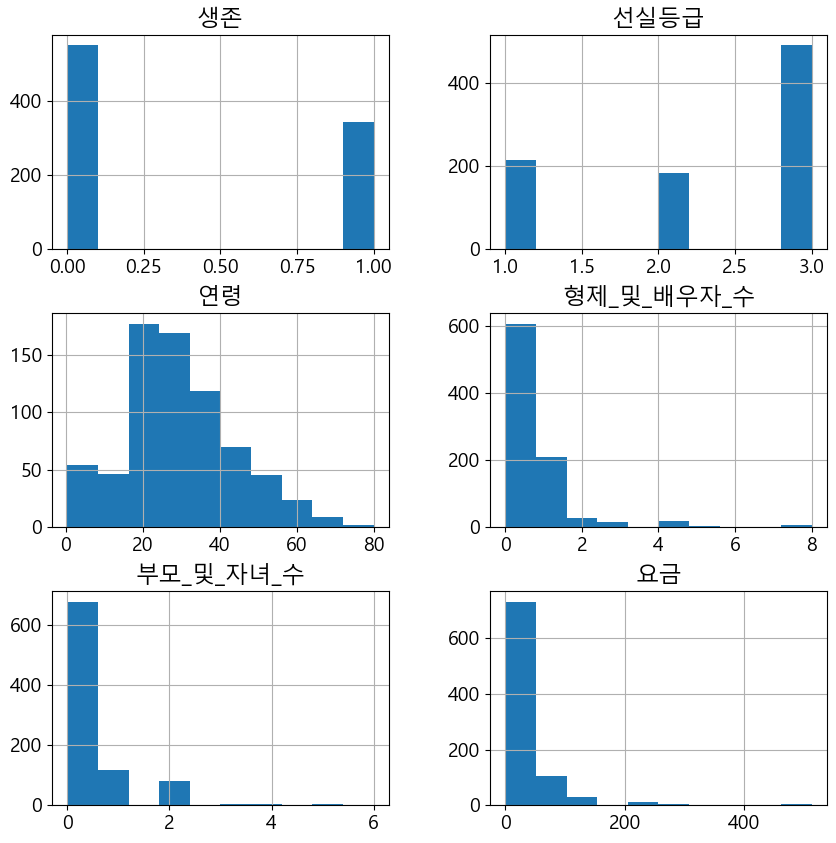

In [14]:
# 숫자 필드의 필드명 정의
columns_n = ['생존','선실등급','연령','형제_및_배우자_수','부모_및_자녀_수','요금']

# 그래프 영역 조정
plt.rcParams['figure.figsize'] = (10,10)

# 데이터프레임의 숫자 필드에 대해 히스토그램을 출력
df_titanic[columns_n].hist()
plt.show()


### 8) 숫자 값이 아닌 필드에 대한 그래프 그리기

분석 대상 필드의 그래프 출력 (숫자 값이 아닌 필드)

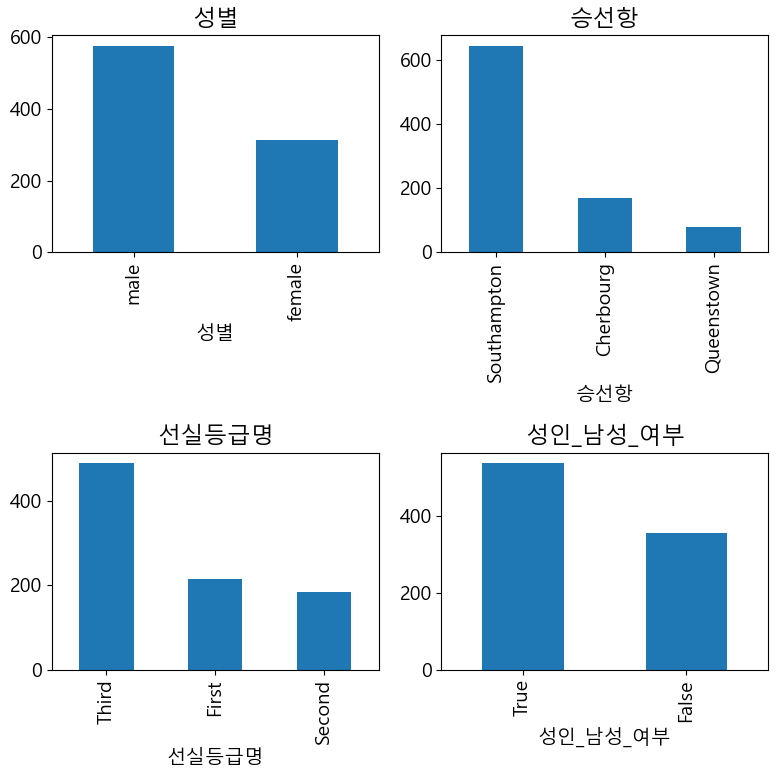

In [15]:
# 그래프를 그릴 필드의 필드명 정의
columns_c = ['성별','승선항','선실등급명','성인_남성_여부']

plt.rcParams['figure.figsize'] = (8,8)

# 반복문을 돌며 히스토그램을 그린다.
for i,name in enumerate(columns_c):
    ax = plt.subplot(2,2,i + 1)
    df_titanic[name].value_counts().plot(kind='bar',title=name,ax=ax)

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 2. 시각적인 분석 및 데이터 확인 방법

matplotlib과 seaborn 등의 그래프 라이브러리를 활용해 시각적으로 데이터를 분석하고 확인하는 방법

### 1) 아이리스 데이터 집합

아이리스 데이터 집합을 사용
아이리스 데이터 집합은 세 종류의 붓꽃 꽃받침과 꽃잎의 길이와 폭을 측정.

아이리스 데이터 집합의 필드 목록

**꽃받침 길이** (sepal_length)
**꽃받침 폭** (sepal_width)
**꽃잎 길이** (petal_length)
**꽃잎 폭** (petal_width)
**종** (species): versicolor / setosa / virginica

종의 붓꽃의 종을 의미하며 versicolor/setosa/virginica 세 종류 중 한 가지.
꽃받침은 꽃잎이 붙은 잎과 같은 기관으로, 꽃잎을 지지하는 역할.
붓꽃의 꽃받침에서 나타나는 특징은 꽃잎과 같이 보라색을 띄며, 꽃잎보다 크기가 큼.

아이리스 데이터 집합의 장점

* 입력 데이터의 필드 수가 작다.(4개)
* 입력 데이터의 모든 필드가 숫자 필드다.
* 입력 데이터의 모든 필드가 꽃을 구성하는 요소의 길이로서, 필드 간의 상관관계를 쉽게 떠올릴 수 있다.
* 머신러닝에 대한 설명에 매우 자주 등장한다.

### 2) 데이터 읽어 들이기

아이리스 데이터 집합 역시 seaborn 라이브러리에서 데이터를 읽어 들이는 함수가 제공됨.

In [16]:
# 추가 라이브러리 임포트
import seaborn as sns

# 데이터 읽어 들이기
df_iris = sns.load_dataset('iris')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa
...,...,...,...,...,...
145,6.7000,3.0000,5.2000,2.3000,virginica
146,6.3000,2.5000,5.0000,1.9000,virginica
147,6.5000,3.0000,5.2000,2.0000,virginica
148,6.2000,3.4000,5.4000,2.3000,virginica


In [17]:
# 우리말 필드명 정의
columns_i = ['꽃받침_길이','꽃받침_폭','꽃잎_길이','꽃잎_폭','종']
df_iris.columns = columns_i

df_iris.head()

,꽃받침_길이,꽃받침_폭,꽃잎_길이,꽃잎_폭,종
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


In [18]:
# 데이터 내용 확인
display(df_iris.head())

,꽃받침_길이,꽃받침_폭,꽃잎_길이,꽃잎_폭,종
0,5.1000,3.5000,1.4000,0.2000,setosa
1,4.9000,3.0000,1.4000,0.2000,setosa
2,4.7000,3.2000,1.3000,0.2000,setosa
3,4.6000,3.1000,1.5000,0.2000,setosa
4,5.0000,3.6000,1.4000,0.2000,setosa


In [19]:
df_iris.shape

(150, 5)

In [20]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃받침_길이  150 non-null    float64
 1   꽃받침_폭   150 non-null    float64
 2   꽃잎_길이   150 non-null    float64
 3   꽃잎_폭    150 non-null    float64
 4   종       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
df_iris.value_counts('종')

종
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [22]:
df_iris.describe()

,꽃받침_길이,꽃받침_폭,꽃잎_길이,꽃잎_폭
count,150.0000,150.0000,150.0000,150.0000
mean,5.8433,3.0573,3.7580,1.1993
std,0.8281,0.4359,1.7653,0.7622
min,4.3000,2.0000,1.0000,0.1000
25%,5.1000,2.8000,1.6000,0.3000
50%,5.8000,3.0000,4.3500,1.3000
75%,6.4000,3.3000,5.1000,1.8000
max,7.9000,4.4000,6.9000,2.5000


### 3) matplotlib을 이용해 산점도 그리기

matplotlib의 scatter()를 이용.

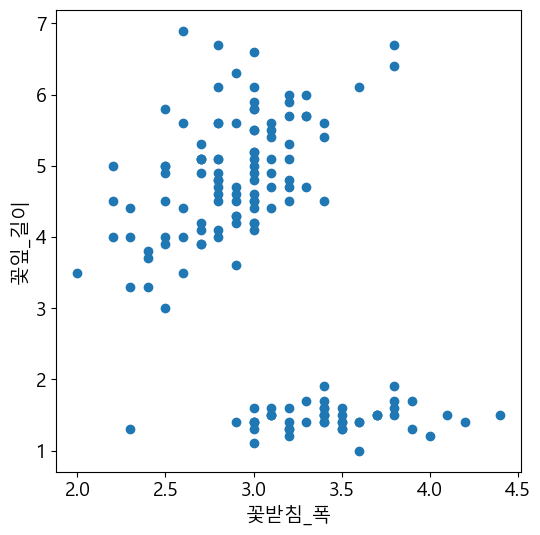

In [23]:
# 그래프 작도 영역을 조정
plt.figure(figsize = (6,6))

# 산점도 그리기
plt.scatter(df_iris['꽃받침_폭'],df_iris['꽃잎_길이'])

# 레이블 표시 - sepal(꽃받침), petal(꽃잎)
plt.xlabel('꽃받침_폭')
plt.ylabel('꽃잎_길이')
plt.show()

### 4) seaborn을 이용해 산점도 그리기

seaborn은 matplotlib보다 정교한 그래프를 만듬

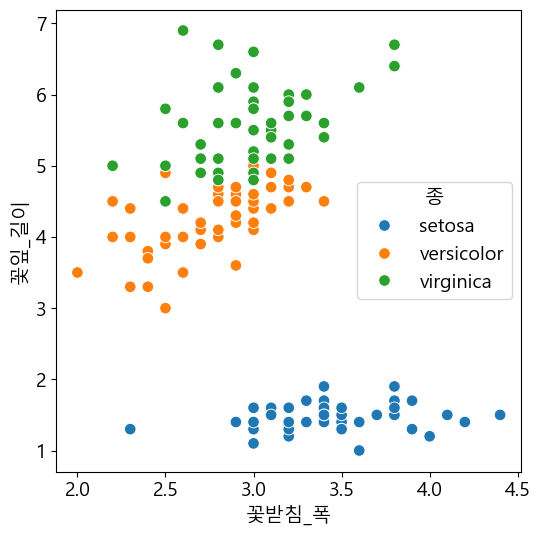

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df_iris, x = '꽃받침_폭', y = '꽃잎_길이', hue='종', s=70)
plt.show()

matplotlib의 scatter()와 seaborn의 scatterplot() 함수의 가장 큰 차이점은 hue 인자를 통해 색을 구분하는 기능을 제공.
matplotlib의 scatter()도 색 구분 기능이 제공되지만 코드가 복잡.

### 5) pairplot 함수를 이용한 산점도 그리기

seaborn에는 산점도를 그릴 수 있는 고급 기능을 제공하는 pairplot()함수도 제공.

<Figure size 1200x1200 with 0 Axes>

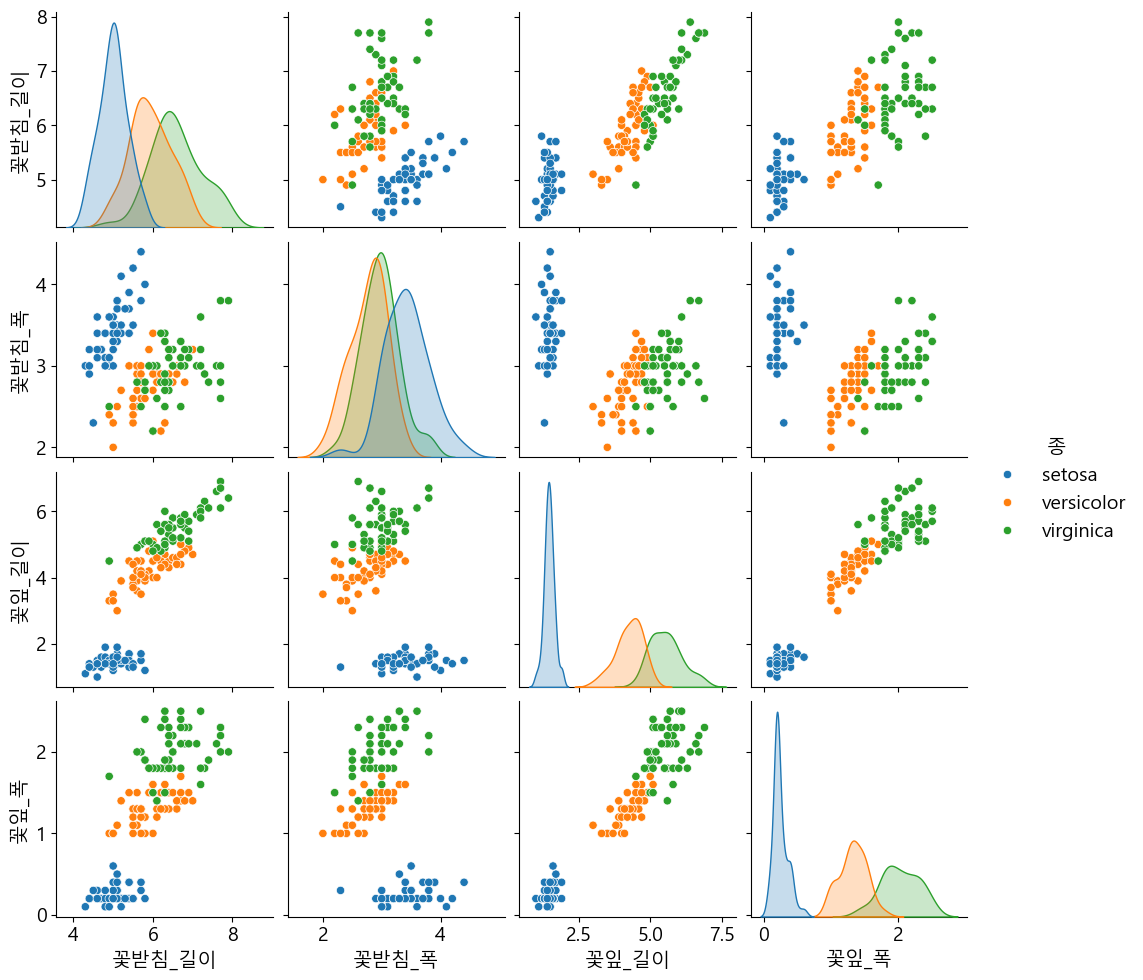

In [25]:
# 모든 필드의 조합으로 산포도 그리기
plt.figure(figsize=(12,12))
sns.pairplot(df_iris, hue = '종')
plt.show()

pairplot()은 많은 정보를 제공.
3차원 이상의 데이터를 제공하면 그중 2개의 필드를 고르는 모든 조합에 대해 산점도를 그려줌.
왼쪽 위부터 오른쪽 아래를 가로지르는 대각선 부분은 두 변수가 같으므로 한 가지 변수에 대한 분포를 종별로 색을 다르게 보여줌.

### 6) jointplot 함수를 이용한 산점도 그리기

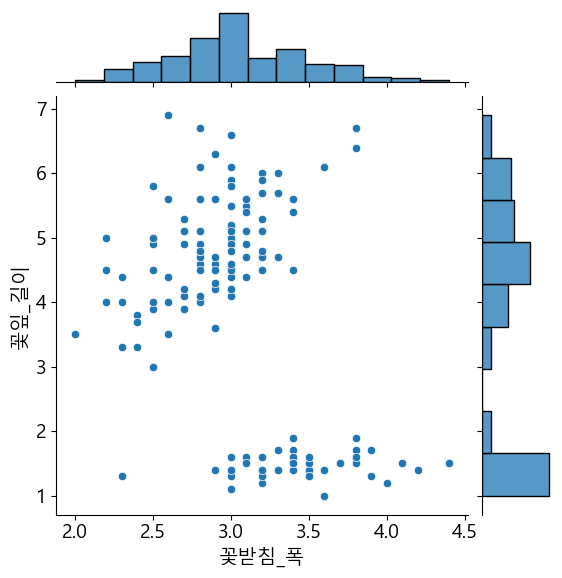

In [26]:
sns.jointplot(data=df_iris, x = '꽃받침_폭',y = '꽃잎_길이')
plt.show()
# 산점도 바깥쪽에 두 개의 히스토그램이 함께 그려짐.
# 입력된 두 변수를 각각 독립된 변수로 보는 히스토그램
# 산점도와 두 개의 히스토그램을 동시에 볼수 있다는 점이 jointplot() 함수의 특징.

### 7) 데이터프레임을 이용한 상자 수염 그리기

데이터프레임 객체에서 제공하는 boxplot()함수를 이용하는 방법.

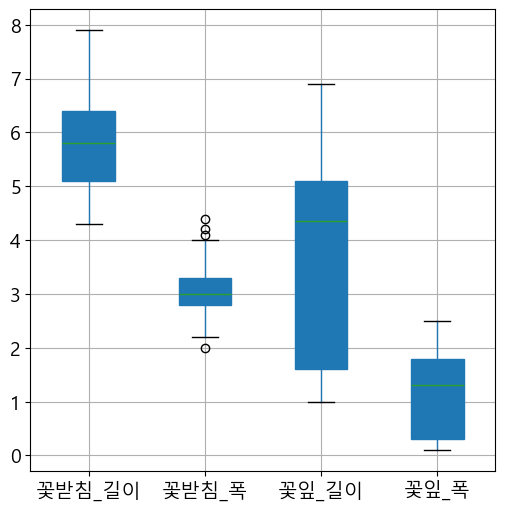

In [27]:
# 그래프 작도 영역 조정
plt.figure(figsize = (6,6))

# 상장 수염 그림 그리기
df_iris.boxplot(patch_artist = True)
plt.show()

### 8) seaborn을 이용해 상자 수염 그리기

seaborn 라이브러리의 boxplot()함수를 사용하려면 데이터 구조를
'종', 'variable'(필드명), 'value'(값) 형식으로 바꾸야 함.
데이터프레임의 melt 함수를 사용하면 데이터 구조를 바꿀수 있음.

In [28]:
w = pd.melt(df_iris, id_vars=['종'])

# 전처리 겨로가 확인
display(w.head())
display(w.tail())

,종,variable,value
0,setosa,꽃받침_길이,5.1000
1,setosa,꽃받침_길이,4.9000
2,setosa,꽃받침_길이,4.7000
3,setosa,꽃받침_길이,4.6000
4,setosa,꽃받침_길이,5.0000


,종,variable,value
595,virginica,꽃잎_폭,2.3000
596,virginica,꽃잎_폭,1.9000
597,virginica,꽃잎_폭,2.0000
598,virginica,꽃잎_폭,2.3000
599,virginica,꽃잎_폭,1.8000


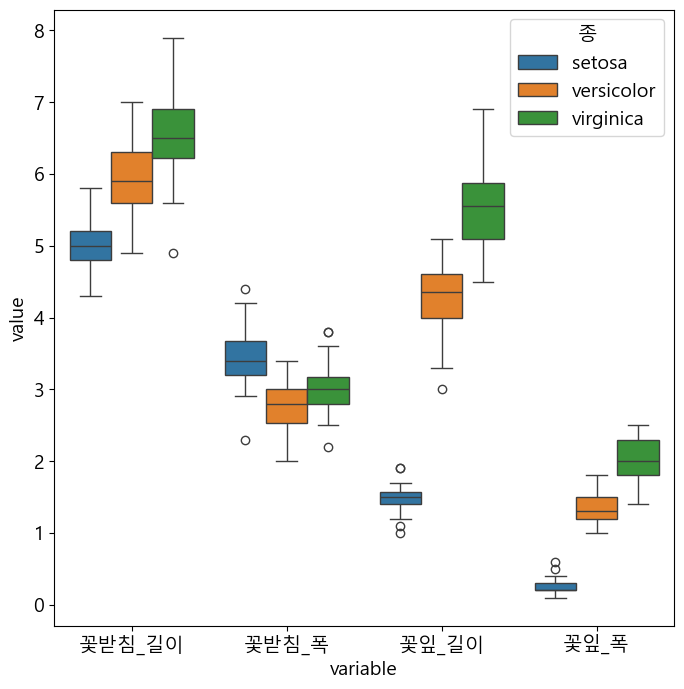

In [29]:
# 인자 hue를 추가해 꽃의 종마다 그림을 따로 그리게 한다
plt.figure(figsize=(8,8))
sns.boxplot(data=w,x='variable',y='value',hue='종')
plt.show()

그림을 보면 값이 일정하지 않아 보이던 '꽃잎_길이' 필드 값이 사실 꽃의 종류에 따라 차이가 컸던 것이고
같은 종의 꽃끼리는 크게 차이가 나지 않는다는 것을 알 수 있음.

# 02. 데이터 전처리

In [30]:
# 추가 라이브러리 임포트
import seaborn as sns

In [31]:
# 데이터 읽어 들이기
df_titanic = sns.load_dataset('titanic')

# 우리말 필드명 정의
columns_t = ['생존', '선실등급', '성별', '연령', '형제_및_배우자_수',
             '부모_및_자녀_수', '요금', '승선항_코드', '선실등급명',
             '남녀어린이_구분', '성인_남성_여부', '데크번호', '승선항', '생존_여부', '독신_여부']
df_titanic.columns = columns_t
df_titanic.head()

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,선실등급명,남녀어린이_구분,성인_남성_여부,데크번호,승선항,생존_여부,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


타이타닉 데이터 집합의 각 필드와 의미   

**생존** (survival): (0=사망, 1=생존)   
**선실등급** (pclass): (1=1등실, 2=2등실, 3=3등실)   
**성별**(sex): (male=남성, female=여성)   
**연령**(age)   
**형제 및 배우자 수**(sibsp): 동승한 형제 혹은 배우자의 수   
**부모 및 자녀 수**(parch): 동승한 부모 혹은 자녀의 수   
**요금**(fare)   
**승선항 코드**(embarked): (C=Cherbourg, Q=Queenstown, S=Southampton)   
**선실등급명**(class): (First=1등실, Second=2등실, Third=3등실)   
**남녀어린이 구분**(who): (man=성인 남성, woman=성인 여성, child=어린이)   
**성인 남성 여부**(adult_male): True/False   
**데크번호**(deck): 선실번호의 머리글자 (A부터 G까지)   
**승선항**(embark_town): Southampton/Cherbourg/Queenstown   
**생존 여부**(alive): yes / no   
**독신 여부**(alone): True/ False   

## 1. 불필요한 필드 삭제하기

선실등급(pclass)과 선실등급명(class), 승선항 코드(embarked)와 승선항(embark_town),
생존(survival)과 생존 여부(alive)는 각각 의미가 같은 중복 코드.
머신러닝 모델을 만들 때 같은 정보를 담은 데이터 필드가 여러 개 있으면 오히려 정확도가 떨어지기도 함.
중복되는 필드를 삭제하는 것이 중요.

중복되는 필드 중 남길 필드는 순서가 있는 숫자형을 남기는 편이 좋음.
예를 들어 선실등급(1, 2, 3)과 선실등급명(First, Second, Third)의 경우 순서가 있는 필드가 우선.
값이 두 종류이고 어느 한쪽이 0/1로 값을 나타낸다면 해당필드를 우선. (생존 / 생존 여부)
그 이외에는 어느것을 선택해도 무방하므로 구현의 편의성과 사람이 이해하기 유리한 것을 고려해 선택. (승선항코드 / 승선항)
승선항코드 / 승선항의 경우 원 핫 인코딩시에 필드명을 짧게 유지할 수 있게 승선항 코드를 남김.

In [32]:
# 선실등급명 ('선실 등급'과 중복)
df1 = df_titanic.drop('선실등급명', axis = 1)

# 승선항 ('승선항 코드'와 중복)
df2 = df1.drop('승선항',axis = 1)

# 생존 여부 ('생존'과 중복)
df3 = df2.drop('생존_여부',axis = 1)

# 결과 확인
display(df3.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,NaN,True


## 2. 누락 값 처리하기

In [33]:
# 누락 값 확인하기
df3.isnull().sum()

생존              0
선실등급            0
성별              0
연령            177
형제_및_배우자_수      0
부모_및_자녀_수       0
요금              0
승선항_코드          2
남녀어린이_구분        0
성인_남성_여부        0
데크번호          688
독신_여부           0
dtype: int64

연령, 승선항_코드, 데크번호 이렇게 세 개의 필드에 누락 값이 포함.

승선항_코드 필드에는 누락 값이 2건뿐.
전체 891건이라 2건은 적은 수라서 행 전체를 삭제.

연령 필드는 누락 값이 177건으로 상대적으로 많은 수.
많은 수라서 행 삭제를 하면 모델의 정확도에도 영향을 미침.
그러므로 행 전체를 삭제하는 대신 빠진 값을 채워 넣는 방식.
연령 필드 같은 숫자 값 필드의 누락 값을 채우는 데는 해당 필드의 평균값으로 누락 값을 대체하는 방법을 많이 사용.

데크번호 필드가 누락 값이 제일 많음.
전체 데이터 건수의 절반을 넘기 때문에 행 전체를 삭제하기 보다는 누락 값을 채워 넣음.
문자열이어서 일단 분포를 살펴봄.

In [34]:
df3['데크번호'].value_counts()

데크번호
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

필드의 값은 숫자가 아니라 A부터 G까지의 알파벳 문자.
이런 경우에는 누락 값을 의미하는 별도의 코드(이를 테면 N)를 할당하는 방법이 가장 일반적.

누락 값 처리 방법   
**승선항 코드**: 누락 값이 2건(적음)   
-> 행 전체를 삭제   

**연령**: 숫자 데이터이며 누락 값이 177건(꽤 많음)   
-> 필드 값의 평균값으로 누락 값을 대체   

**데크번호**: 코드값 필드이며 누락 값이 688건(아주 많음)   
-> 누락 값을 의미하는 더미 코드를 부여함   

### 1) 승선항_코드: 누락 값이 2건(적음)

-> 행 전체를 삭제

In [35]:
# dropna 함수 사용
df4= df3.dropna(subset=['승선항_코드'])

### 2) 연령: 숫자 데이터이며 누락 값이 177건(꽤 많음)

-> 필드 값의 평균값으로 누락 값을 대체

In [36]:
# 평균값 계산
mean = int(df3['연령'].mean())

# fillna 함수 사용
df5 = df4.fillna({'연령':mean})

### 3) 데크번호: 코드값 필드이며 누락 값이 688건(아주 많음)

-> 누락 값을 의미하는 더미 코드를 부여함

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   생존          889 non-null    int64   
 1   선실등급        889 non-null    int64   
 2   성별          889 non-null    object  
 3   연령          889 non-null    float64 
 4   형제_및_배우자_수  889 non-null    int64   
 5   부모_및_자녀_수   889 non-null    int64   
 6   요금          889 non-null    float64 
 7   승선항_코드      889 non-null    object  
 8   남녀어린이_구분    889 non-null    object  
 9   성인_남성_여부    889 non-null    bool    
 10  데크번호        201 non-null    category
 11  독신_여부       889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 72.4+ KB


In [38]:
df5['데크번호'] = df5['데크번호'].astype(np.str_) # 형변환
df6 = df5.fillna({'데크번호':'N'})

In [39]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   생존          889 non-null    int64  
 1   선실등급        889 non-null    int64  
 2   성별          889 non-null    object 
 3   연령          889 non-null    float64
 4   형제_및_배우자_수  889 non-null    int64  
 5   부모_및_자녀_수   889 non-null    int64  
 6   요금          889 non-null    float64
 7   승선항_코드      889 non-null    object 
 8   남녀어린이_구분    889 non-null    object 
 9   성인_남성_여부    889 non-null    bool   
 10  데크번호        889 non-null    object 
 11  독신_여부       889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 78.1+ KB


누락 값을 포함한 행 전체를 삭제하려면 dropna() 함수,
누락 값을 대체하려면 fillna() 함수.

In [40]:
# 결측치가 있는지 다시 한번 확인
df6.isnull().sum()

생존            0
선실등급          0
성별            0
연령            0
형제_및_배우자_수    0
부모_및_자녀_수     0
요금            0
승선항_코드        0
남녀어린이_구분      0
성인_남성_여부      0
데크번호          0
독신_여부         0
dtype: int64

In [41]:
display(df6.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,male,22.0000,1,0,7.2500,S,man,True,nan,False
1,1,1,female,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0000,0,0,7.9250,S,woman,False,nan,True
3,1,1,female,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0000,0,0,8.0500,S,man,True,nan,True


## 3. 이진 레이블값 필드를 숫자 값 필드로 만들기

레이블값 필드 : 타이타닉 데이터 집합의 필드 중 성별 필드는 male / female 두 가지 문자열을 값으로 가짐.
이렇게 정해진 종류의 문자열만을 값으로 갖는 필드.

레이블값 필드는 별도의 가공없이는 머신러닝 모델에 입력할 수 없어서 "레이블값 필드를 숫자값 필드로 변환"하는 과정이 데이터 전처리에 포함.

성별 필드처럼 값이 두 가지뿐인 레이블을 이진 레이블이라고 하고, 이진 레이블은 숫자로 변환하기 비교적 쉬움.
대개는 1 / 0 으로 변환

데이터 전처리 중인 데이터 집합(df6)에서 이진 레이블값 필드는 성별 : male / female, 성인_남성_여부 : True / False,
독신_여부 : True / False 세 개의 필드.

성별 : male / female
성인_남성_여부 : True / False
독신_여부 : True / False
위 필드의 값을 각각 1 / 0으로 변환

### 1) '성별' 필드를 숫자 값 필드로 변환

In [42]:
df6['성별'].value_counts()

성별
male      577
female    312
Name: count, dtype: int64

In [43]:
# 딕셔너리 mf_map 정의
mf_map = {'male':1, 'female':0}
# map 함수를 사용해서 레이블을 수치로 변환
df7 = df6.copy()
df7['성별'] = df7['성별'].map(mf_map)

In [44]:
display(df7.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,1,22.0000,1,0,7.2500,S,man,True,nan,False
1,1,1,0,38.0000,1,0,71.2833,C,woman,False,C,False
2,1,3,0,26.0000,0,0,7.9250,S,woman,False,nan,True
3,1,1,0,35.0000,1,0,53.1000,S,woman,False,C,False
4,0,3,1,35.0000,0,0,8.0500,S,man,True,nan,True


In [45]:
df7['성별'].value_counts()

성별
1    577
0    312
Name: count, dtype: int64

### 2) '성인_남성_여부', '독신_여부' 필드를 숫자 값 필드로 변환

In [46]:
df7['성인_남성_여부'].value_counts()

성인_남성_여부
True     537
False    352
Name: count, dtype: int64

In [47]:
# 딕셔너리 tf_map 정의
tf_map = {True:1, False:0}

df8 = df7.copy()
df8['성인_남성_여부'] = df8['성인_남성_여부'].map(tf_map)

df9 = df8.copy()
df9['독신_여부'] = df9['독신_여부'].map(tf_map)

In [48]:
display(df9.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,남녀어린이_구분,성인_남성_여부,데크번호,독신_여부
0,0,3,1,22.0000,1,0,7.2500,S,man,1,nan,0
1,1,1,0,38.0000,1,0,71.2833,C,woman,0,C,0
2,1,3,0,26.0000,0,0,7.9250,S,woman,0,nan,1
3,1,1,0,35.0000,1,0,53.1000,S,woman,0,C,0
4,0,3,1,35.0000,0,0,8.0500,S,man,1,nan,1


## 4. 다중 레이블값 필드를 숫자 값 필드로 만들기

* 원-핫 인코딩
레이블이 세 가지 이상인 다중 레이블값 필드를 숫자 값 필드로 변환하는 방법.
직관적으로 다중 레이블 역시 0, 1, 2와 같이 여러 개의 숫자를 할당하는 방법보다는 원 핫 인코딩 one-hot encording을 많이 사용.
숫자 값으로 변경하면 자동으로 대소 관계가 결정.
원-핫 인코딩을 인코딩된 데이터의 차원은 필드 값 종류의 수와 같음.
즉, 각 레이블에 대응하는 열을 만들고 해당하는 행의 값은 1, 관계없는 행을 0을 부여.

반대로 높음, 중간, 낮음 처럼 다중 레이블이면서도 절대적인 순서 관계가 있다면 원-핫 인코딩을 사용하지 않아도 됨.

원-핫 인코딩에 주의할 점은 머신러닝 모델은 입력 데이터의 필드 수가 너무 많으면 학습이 잘 되지 않는 경향이 있음.
예를 들어 학습 데이터의 입력 필드 중 필드값이 1000가지인 필드에 원-핫 인코딩을 적용하면
필드수가 1000개가 되어 입력이 갑자기 1000차원이 되는 것과 마찬가지라서 학습이 잘 되지 않을 위험이 있음.

또 학습이 잘 되더라도 필드 수가 늘어난 만큼 더 많은 학습 데이터가 필요하게 됨.
그로 인해 머신러닝에서 가장 중요하면서도 비용이 많이 드는 학습 데이터 수집 작업의 부하가 커짐.

In [49]:
# get_dummies() 함수 사용하기
# 데이터프레임의 get_dummies() 함수 사용
# 변환전
df9[['남녀어린이_구분']].head(10)
df9['남녀어린이_구분'].value_counts()

남녀어린이_구분
man      537
woman    269
child     83
Name: count, dtype: int64

In [50]:
# get_dummies 함수의 사용 예제
w = pd.get_dummies(df9['남녀어린이_구분'], prefix='남녀어린이_구분',dtype=int)
w.head(10)

,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,1
9,1,0,0


get_dummies 함수는 데이터프레임의 특정 열(남녀어린이_구분)을 인자로 받음.
옵션 인자 prefix가 있어서 자동으로 생성되는 열의 이름 앞에 지정한 문자열을 붙일 수 있음.
이 옵션은 필드 값이 중복되는 여러 필드에 원-핫 인코딩을 적용할 때 유용.

실제 학습 데이터를 다룰 때는 이렇게 인코딩된 열을 학습 데이터로 추가하고 그 대신 원래 있던 필드를 삭제.

In [51]:
def enc(df, column):
    """get_dummies 함수를 사용해 정의한 범주값을 원-핫 벡터로 변환하는 함수
    df : 대상 데이터프레임, column : 대상 필드"""
    # 원-핫 벡터 생성
    df_dummy = pd.get_dummies(df[column], prefix = column, dtype = int)
    # 기존 필드 삭제
    df_drop = df.drop([column], axis = 1)
    # 데이터프레임과 원-핫 인코딩 필드를 결합
    df1 = pd.concat([df_drop,df_dummy], axis = 1)
    return df1

In [52]:
# 남녀어린이_구분
# man / woman / child

# 레이블값 확인하기
df9['남녀어린이_구분'].value_counts()

남녀어린이_구분
man      537
woman    269
child     83
Name: count, dtype: int64

In [53]:
# 원-핫 인코딩 적용
# 남녀어린이_구분 필드
df10 = enc(df9,'남녀어린이_구분')

# 결과 확인
display(df10.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,승선항_코드,성인_남성_여부,데크번호,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman
0,0,3,1,22.0000,1,0,7.2500,S,1,nan,0,0,1,0
1,1,1,0,38.0000,1,0,71.2833,C,0,C,0,0,0,1
2,1,3,0,26.0000,0,0,7.9250,S,0,nan,1,0,0,1
3,1,1,0,35.0000,1,0,53.1000,S,0,C,0,0,0,1
4,0,3,1,35.0000,0,0,8.0500,S,1,nan,1,0,1,0


In [54]:
# 승선항 코드 및 데크번호에도 원-핫 인코딩 적용

# 승선항_코드 필드
df11 = enc(df10,'승선항_코드')

# 데크번호
df12 = enc(df11,'데크번호')

display(df12.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman,승선항_코드_C,승선항_코드_Q,승선항_코드_S,데크번호_A,데크번호_B,데크번호_C,데크번호_D,데크번호_E,데크번호_F,데크번호_G,데크번호_nan
0,0,3,1,22.0000,1,0,7.2500,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,38.0000,1,0,71.2833,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,26.0000,0,0,7.9250,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,35.0000,1,0,53.1000,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,35.0000,0,0,8.0500,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


## 5. 데이터 정규화

데이터 정규화 : 머신러닝에 사용되는 데이터는 그 값이 너무 크거나 작지 않고 적당한 범위(-1에서 1 사이)에 있어야 모델의 정확도가 높아짐
그래서 학습 전에 미리 값을 적당한 범위를 유지하도록 모델에 입력할 데이터를 변환하는 작업을 데이터 정규화.

정규화에 많이 쓰이는 기법은 정규화와 표준화가 있음.

1) 정규화 normalization
입력변수 x를 최소값은 0, 최대값은 1이 되게 1차 함수를 통해 변환.

2) 표준화 standardization
입력변수 x를 평균이 0, 분산이 1인 정규분포가 되게 1차 함수를 통해 변환.

두 가지 기법 중 정규화는 이상값의 영향을 쉽게 받음.
따라서 데이터에 이상값 포함 가능성이 높다면 표준화를 적용.

반대로, 이미지 데이터처럼 최소값(0)과 최대값(255)을 미리 알수 있는 경우에는 정규화를 사용.


타이타닉 표준 데이터에 정규화에 연령, 요금 필드에 표준화를 적용.

In [55]:
df13 = df12.copy()

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
df13[['연령','요금']] = stdsc.fit_transform(df13[['연령','요금']])

# 결과 확인
display(df13.head())

,생존,선실등급,성별,연령,형제_및_배우자_수,부모_및_자녀_수,요금,성인_남성_여부,독신_여부,남녀어린이_구분_child,남녀어린이_구분_man,남녀어린이_구분_woman,승선항_코드_C,승선항_코드_Q,승선항_코드_S,데크번호_A,데크번호_B,데크번호_C,데크번호_D,데크번호_E,데크번호_F,데크번호_G,데크번호_nan
0,0,3,1,-0.5796,1,0,-0.5002,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,1,0,0.6546,1,0,0.7889,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
2,1,3,0,-0.2711,0,0,-0.4866,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,1,0,0.4232,1,0,0.4229,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,3,1,0.4232,0,0,-0.4841,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1


연령, 요금 필드 값이 -1 부터 1 사이의 범위에 들어감.

# 03. 알고리즘 선택하기

실무에서 많이 사용되는 처리 패턴인 분류를 대상으로, 대표적인 알고리즘을 알아보고 선택하는 방법도 알아봄.
알고리즘을 선택하는 원칙을 알아보고 각 알고리즘이 어떤 데이터 전처리를 필요로 하는지 알아봄.

## 1. 대표적인 분류 알고리즘과 특징

* 구현 방식에 따른 분류

### 1) 손실 함수 타입

로지스틱 회귀 : 시그모이드 함수의 출력을 확률로 취급. 결정 경계는 직선 형태.
서포트 벡터 머신(커널) : 커널 트릭을 적용해 직선 이외의 결정 경계를 가질 수 있음
신경망 : 중간층을 추가하는 방법으로 직선 이외의 결정 경계를 가질 수 있음.

모델의 구조가 수학적 함수로 결정되 있고, 학습은 함수의 파라미터를 최적화하는 과정에 해당.
예를 들어 로지스틱 회귀는 1차 함수를 사용해 세 개의 파라미터를 최적화.

파라미터를 최적화하는 구체적인 방법은 모델의 정확도가 높아질수록 함수값이 작아지는 (모두 정답을 맞히면 0이 되는) 함수인
"손실 함수"를 정의하고 수학적인 방법을 통해 이 함수의 함수값이 최소가 되는 파라미터를 구함.

### 2) 결정 트리 타입

결정 트리 : 특정 필드의 값을 기준으로 그룹을 나누는 과정을 반복.
랜덤 포레스트 : 학습 데이터의 일부분으로 여러 개의 결정 트리를 만든 다음, 결정 트리 간의 다수결로 결정.
XGBoost : 오분류됐던 데이터로 분류 모델을 만들어 정확도를 향상시키는 기법.

구현 방식은 손실 함수 타입과 결정 트리 방식의 두 가지가 있음.
전처리 기법 중 데이터 정규화는 손실 함수 타입에서 효과적인 기법이며, 결정 트리 타입에서는 효과를 보기 어려움.
알고리즘 선택에 따라 필요한 전처리 기법도 달라지기 때문에 모델 내부에 대한 이해 없이
그냥 활용만 할 생각이더라도 알고리즘의 구현 방식이 무엇인지는 알아둘 필요가 있음.

특정 필드에 역치 threshold를 설정하고 필드 값이 이 역치보다 큰가 작은가를 기준으로 그룹을 나누는 방식.
어떤 필드의 값이 어떤 역치 값에 따라 어떻게 그룹이 나뉘는가에 대한 규칙을 결정하는 것이 학습 과정이 됨.
랜덤 포레스트와 XGBoost는 결정 트리를 개량한 알고리즘으로,
여러 개의 결정 트리를 조합하는 방식으로 모델의 정확도를 향상시킨 모델.

손실 함수 타입은 입력값이 극단적으로 커지거나 작아지는 경우 알고리즘이 제대로 동작하지 않음.
이 경우에는 데이터 정규화를 미리 거치는 편이 좋음.
결정 트리 타입은 단순히 값의 대소 비교만으로 분류가 이루어지지 때문에 정규화처럼 값의 배율을 조정하는 방법은 영향을 미치지 못함.

## 2. 사용할 데이터

알고리즘을 살펴볼때 사용할 입력 데이터를 유형별로 세 가지 준비.
알고리즘의 이해를 위한 입력 데이터라 단순히 2차원 데이터를 사용.
(x, y)와 같은 2차원 데이터를 입력해 O, X를 예측하는 모델이 대상.

### 1) 데이터 생성

In [56]:
# 라이브러리 임포트
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

In [57]:
# 선형 데이터
X1, y1 = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, random_state= random_seed, n_clusters_per_class=1,n_samples=200, n_classes=2)

In [58]:
# 초승달형 데이터(성형 분리 불가능)

X2, y2 = make_moons(noise= 0.05, random_state = random_seed, n_samples=200)

# 원형 데이터(선형 분리 불가능)
X3, y3 = make_circles(noise= 0.05, random_state = random_seed, n_samples=200)

In [59]:
# 세 가지 데이터를 DataList 변수에 저장
DataList = [(X1,y1),(X2,y2),(X3,y3)]

# N : 데이터 가짓수
N = len(DataList)
print(N)

3


### 2) 데이터의 산점도 그리기

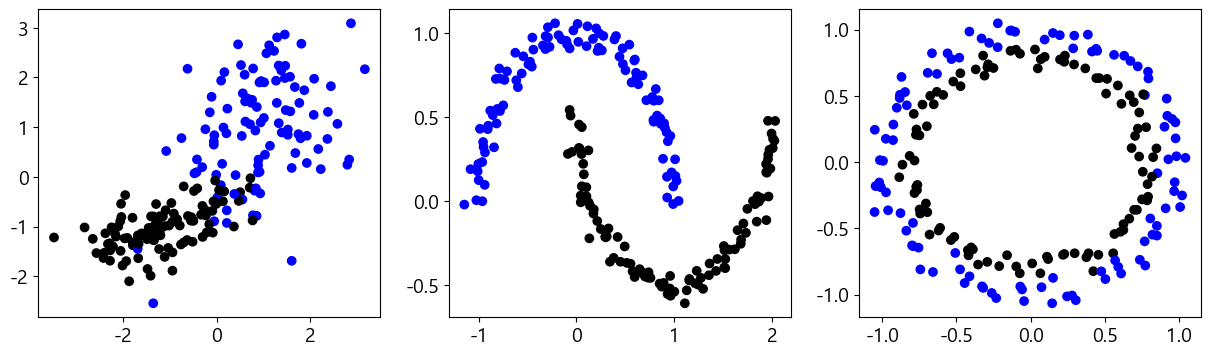

In [60]:
# 산포도 그리기
plt.figure(figsize=(15, 4))

# 컬러맵 정의
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0000FF','#000000']) # 파랑, 검정

for i, data in enumerate(DataList):
    X,y = data
    ax = plt.subplot(1, N, i+1) # 1행 3열의 그래프
    ax.scatter(X[:,0], X[:,1], c = y, cmap = cmap)
plt.show()

첫 번째 데이터는 '선형 분리 가능'한 데이터로 직선을 그어 두 그룹을 나눌 수 있는 유형의 데이터
다만 경계 부근에 약간 데이터가 섞여 있어서 완전히 깔끔하게 분리되지는 않음
각 알고리즘마다 이렇게 섞인 데이터를 어느정도 다르게 처리

두 번째 데이터는 직선으로는 그룹을 나눌 수 없는 '선형 분리가 불가능'한 데이터.

세 번째 데이터는 경계선이 원형이여서 역시 '선형 분리가 불가능'한 데이터.

실제 업무에서 쓰이는 데이터는 첫 번째 데이터처럼 '선형 분리 기능'한 데이터가 많음.
하지만 일부는 복잡한 데이터도 분명히 있기 때문에 복잡한 데이터를 처리할 수 있는지도 알고리즘을 선택하는 주요한 기준 중 하나.

미리 정리
* 세 종류의 예제 데이터는 각각 파란색과 검은색 2차원 점 데이터로 100개로 구성.
* 결과 표시 함수는 100개의 점을 학습용과 검증용으로 50개씩 분할
* 산점도에 학습 데이터는 X, 검증 데이터는 O으로 구분해 출력.
* 결과 표시 함수 실행 전, 알고리즘은 이미 선택된 상태이며 이 알고리즘을 함수에 인자로 전달
* 인자로 전달받은 알고리즘을 이용해 '학습', '예측', '평가'를 모두 결과 표시 함수에서 수행.
* 평가 단계에서 학습 데이터와 검증 데이터에 대한 정확도를 따로 계산해 '검증 데이터 : 0.92 학습 데이터 : 0.91'과 같이 출력.
* 각 데이터 점은 해당하는 그룹에 따라 파란색 / 회색으로 나눠 표시.
* 모델의 확신도(confidence)를 음영의 진하기로 표시.
   진한 부분은 확신도가 높은 부분이고 (확률이 0 또는 1에 가까움), 옅은 부분은 확신도가 낮은 부분(확신도가 0.5에 가까움).
* 결정 경계가 있는 알고리즘은 결정 경계를 굵은 선으로 표시(일부 알고리즘은 결정 경계를 구할 수 없음)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# # 결정 경계를 그리는 함수
# def plot_boundary(ax, x, y, algorithm):
#     """주어진 알고리즘을 사용하여 결정 경계를 시각화하는 함수 
#     ax : matplotlib의 서브플롯(subplot) 객체로, 결정 경계를 그릴 축
#     x : 예측 변수
#     y : 타겟 변수
#     algorithm: 사용할 알고리즘"""

#     # 1) 입력 데이터를 훈련용, 테스트용 데이터 분리
#     x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5, random_state = random_seed)

#     # 컬러맵 정리
#     from matplotlib.colors import ListedColormap
#     cmap1 = plt.cm.bwr # 그라데이션 (음수와 양수 값을 시각적으로 구분할때 유용, 대칭적으로 색을 배분)
#     cmap2 = ListedColormap(['#0000FF','#000000'])

#     # 2) 훈련용 데이터로 알고리즘을 모델 생성 후, 데스트 데이터를 사용하여 정확도를 평가
#     h = 0.005
#     algorithm.fit(x_train,y_train) # 모델 생성
#     score_test = algorithm.score(x_test,y_test) # 테스트 셋으로 정확도 평가
#     score_train = algorithm.score(x_train,y_train) # 훈련용으로 정확도 평가

#     # 3) 입력 데이터의 범위를 기반으로 결정 경계를 생성
#     f1_min = x[:,0].min - 0.5
#     f1_max = x[:,0].max + 0.5
#     f2_min = x[:,1].min - 0.5
#     f2_max = x[:,1].max + 0.5
#     f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))

#     # 4) 알고리즘이 결정함수 (decision_function)를 가지고 있는 경우, 확신도를 구하고 가지고 있지 않는 경우 예측 확률을 구하고 경계를 그림
#     # 확신도 데이터 구한다
#     if hasattr(algorithm, 'decision_function'):
#         # np.c_[f1.ravel(), f2.ravel()] --> f1과 f2로부터 만든 그리드를 결합하여 (x, y) 쌍의 좌표를 만든다
#         Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()]) # 이 좌표들에 대한 결정 함수 값을 계산한 결과
#         Z = Z.reshape(f1.shape)
#         ax.contour(f1, f2, Z, levels=[0], linewidths=2) # 결정 경계 그리기
#     else:
#         # 예측 확률 계산
#         Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
#         Z = Z.reshape(f1.shape)
        
#     # 5) 테스트 데이터와 훈련 데이터를 산점도로 표시, 시각화 처리
#     ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3) # 확신도 그리기
#     # 테스트 데이터 시각화
#     ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap2)
#     # 훈련 데이터 시각화
#     ax.scatter(x_train[:, 0], y_train[:, 1], c=y_train, cmap=cmap2, marker='x')
    
#     # 6) 정확도를 텍스트로 표시
#     text = f'검증:{score_test:.2f}    학습:{score_train:.2f}'
#     ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right', fontsize=18)


In [63]:
# 결정 경계를 그리는 함수

def plot_boundary(ax, x, y, algorithm):

    '''주어진 알고리즘을 사용하여 결정 경계를 시각화하는 함수
    ax: Matplotlib의 서브플롯(subplot) 객체로, 결정 경계를 그릴 축.
    x: 예측 변수
    y: 타겟 변수
    algorithm: 사용할 알고리즘.
    '''
    # 1) 입력 데이터를 훈련용, 테스트용 데이터 분리
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=random_seed)
    # 컬러맵 정의
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])
    # 2) 훈련용 데이터로 알고리즘으로 모델 생성 후, 테스트 데이터를 사용하여 정확도를 평가
    h = 0.005
    algorithm.fit(x_train, y_train)  # 모델 생성
    score_test = algorithm.score(x_test, y_test)  # 테스트 셋으로 정확도 평가
    score_train = algorithm.score(x_train, y_train)  # 훈련용 셋으로 정확도 평가
    # 3) 입력 데이터의 범위를 기반으로 결정 경계를 생성
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), np.arange(f2_min, f2_max, h))
    # 4) 알고리즘이 결정 함수(decision_function)를 가지고 있는 경우, 확신도를 구하고,
    # 가지고 있지 않은 경우, 예측 확률을 구하고 경계를 그림.
    # 확신도 데이터 구함
    if hasattr(algorithm, 'decision_function'):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)

    # 5) 테스트 데이터와 훈련 데이터를 산점도로 표시.
    # 시각화 처리
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3) # 확신도 그리기
    ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap2, marker='x')
    # 6) 정확도를 텍스트로 표시.
    text = f'검증:{score_test:.2f}  학습: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right', fontsize=18)

In [64]:
# 산점도와 결정 경계를 그리는 함수
def plot_boundaries(algorithm, data_list):
    plt.figure(figsize = (15,4))
    for i,data in enumerate(data_list):
        X, y = data
        ax = plt.subplot(1, N, i + 1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()

## 3. 로지스틱 회귀

단계 1 : 입력변수를 1차 함수에 통과시켜 중간값 u를 계산한다.
단계 2 : 1차 함수의 함수값 u를 '시그모이드 함수'에 통과 시킨다.
이 함수의 치역은 0부터 1까지의 값이므로 함수값을 확률로 해석할 수 있다.
단계 3 : 확률값 y의 값이 0.5보다 크면 1로 구분하고, 0.5보다 작으면 0으로 분류한다.

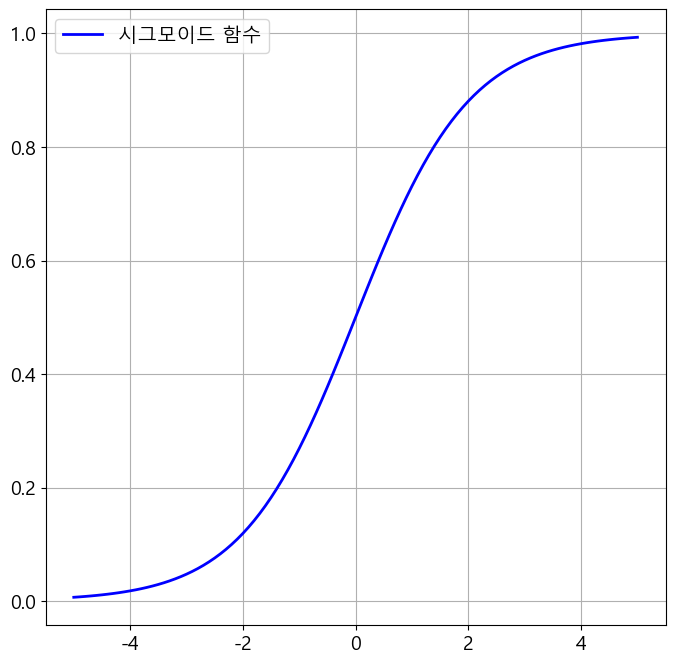

In [65]:
# 시그모이드 함수의 정의;
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# x축 데이터 준비
x = np.linspace(-5,5,101)

# y축 데이터 준비
y = sigmoid(x)

plt.plot(x,y,label = '시그모이드 함수',c='b',lw=2)
plt.legend()
plt.grid()
plt.show()

시그모이드 함수의 주요 특징   
1) 함수값이 계속 증가한다.   
2) 함수값이 0부터 1 사이의 값을 취한다.   
3) 그래프의 모양이 x = 0, y = 0.5인 점을 중심으로 점대칭을 이룬다.   
이러한 성질 덕분에 시그모이드 함수의 함수값은 확률처럼 사용할 수 있음.    
입력 값이 큰 음수라면 확률이 0에 가까워지고, 큰 양수라면 확률이 1에 가까워짐.

In [66]:
# 로지스틱 회귀 알고리즘을 이용한 분류 결과와 산점도
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state = random_seed)
print(algorithm.get_params()) # 알고리즘의 파라미터 출력

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 123, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


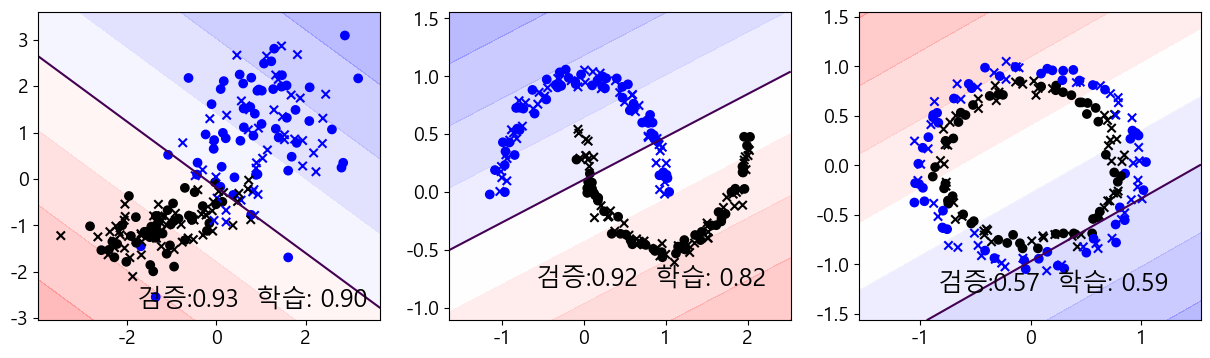

In [67]:
# 결과 표시 함수를 호출한다
plot_boundaries(algorithm, DataList)

세 가지 예제 데이터 중 왼쪽의 선형 분리 가능 데이터는 검증 데이터와 힉습 데이터 모두 거의 비슷한 정확도가 나옴.
이와 달리 오른쪽의 예제 데이터는 직선 형태의 결정 경계로 제대로 분류를 할 수 없기 때문에
분류 성능이 좋은 결정 경계를 발견하지 못했으며, 정확도는 55% ~ 60%에 머무름.

## 4. 서포트 벡터 머신(커널)

직선으로만 결정 경계를 정하려고 하면, 두 번째, 세 번째 예제 데이터는 제대로 분류가 되지 않음.
이러한 문제를 해결하기 위해 고안된 것이 서포트 벡터 머신의 '커널'.

현재 목표는 직선으로 파란색 점과 검은 색 점을 분리하는 것.
데이터를 제대로 분리할 수 없는 경우
2차원을 3차원으로 다시 배치할 수 있다면 평면으로 두 그룹을 나눌 수 있음.
이것이 바로 커널의 밑바탕이 되는 아이디어.

구체적으로 차원을 확장하는 방법은 가우시안 커널, 다항 커널, 시그모이드 커널 등 여러 알고리즘이 있음.
가장 널리 쓰이는 것은 가우시안 커널로, 사이킷런 라이브러리를 사용한다면
kernel='rbf' 옵션을 지정하면 됨.

In [68]:
# SVM(커널)을 이용한 분류 결과 및 산점도
from sklearn.svm import SVC

algorithm = SVC(kernel = 'rbf', random_state = random_seed)
print(algorithm.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 123, 'shrinking': True, 'tol': 0.001, 'verbose': False}


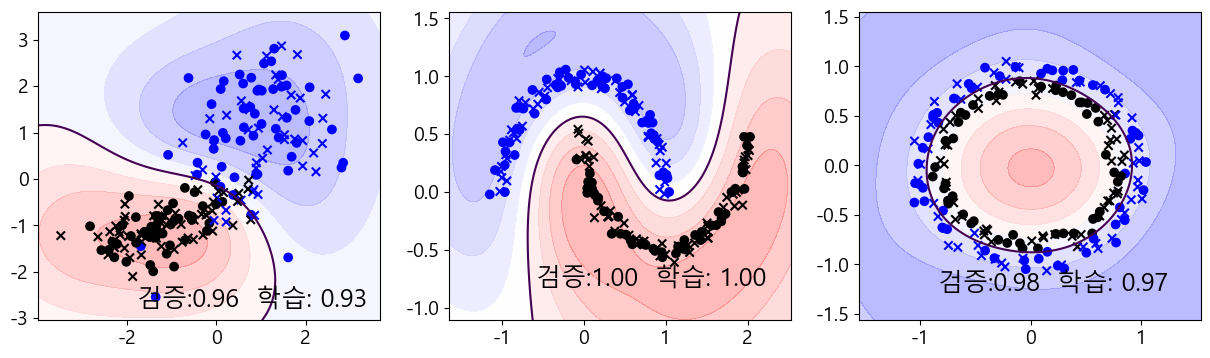

In [69]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

로지스틱 회귀에 비하면 결과차이가 많이남
로지스틱 회귀로 제대로 분리가 안 됐던 두 번째와 세 번째 예제 데이터의 경우
두 데이터 모두 데이터의 특성을 잘 살린 깔끔한 결정 경계를 찾아냄.

## 5. 신경망 알고리즘

신경망은 말 그대로 뇌의 신경세포(뉴런)가 이루는 네트워크를 모방해 만든 알고리즘.
원으로 표시된 것이 하나하나의 뇌세포에 해당하며, 세포 간의 결합을 통해 학습이 진행.
중간층이 한 층이뿐이지만, 이 중간층을 2층 이상으로 늘린 것이 딥러닝.

층을 늘이는 만큼 더욱 복잡한 모델을 만들 수 있으므로 우리가 사용하는 두 번째, 세 번째 예제 데이터같은
선형 분리 불가능한 데이터에도 잘 맞는 결정 경계를 찾아낼수 있음.

### 1) 신경망을 이용한 분류 결과와 산점도

In [70]:
# 알고리즘 선택하기
from sklearn.neural_network import MLPClassifier


algorithm = MLPClassifier(random_state=random_seed)
print(algorithm.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 123, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


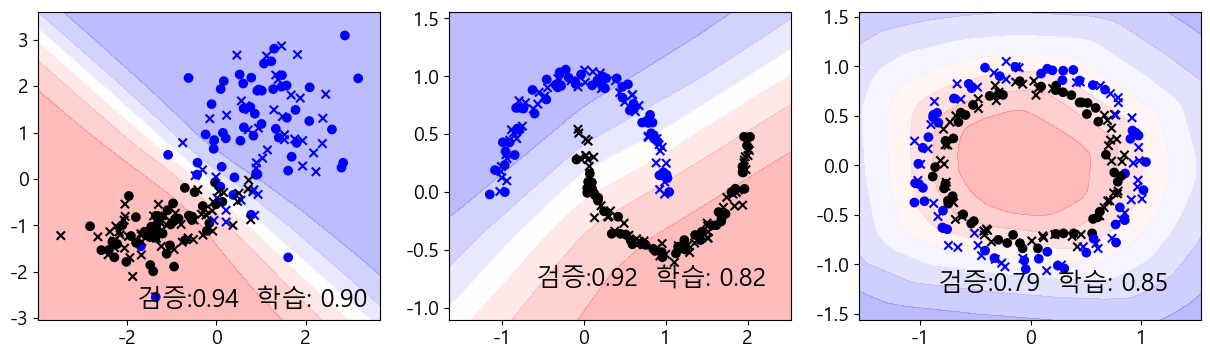

In [71]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

신경망 알고리즘을 이용한 분류 결과, 두 번째와 세 번째 예제 데이터를 보면, 확실히 결정 경계가 직선은 아니어도
데이터에 적합하다고 보기는 어려움.
문제를 해결하기 위해 신경망의 파라미터 중 중간층 노드를 (100, 100)으로 변경.
중간층의 수를 2개로 늘인다는 의미.

### 2) 신경망(중간층 2개 층)을 이용한 분류 결과와 산점도

In [72]:
# 알고리즘 선택하기
# 중간층 노드 수=(100, 100)
algorithm = MLPClassifier(hidden_layer_sizes=(100,100), random_state=random_seed)

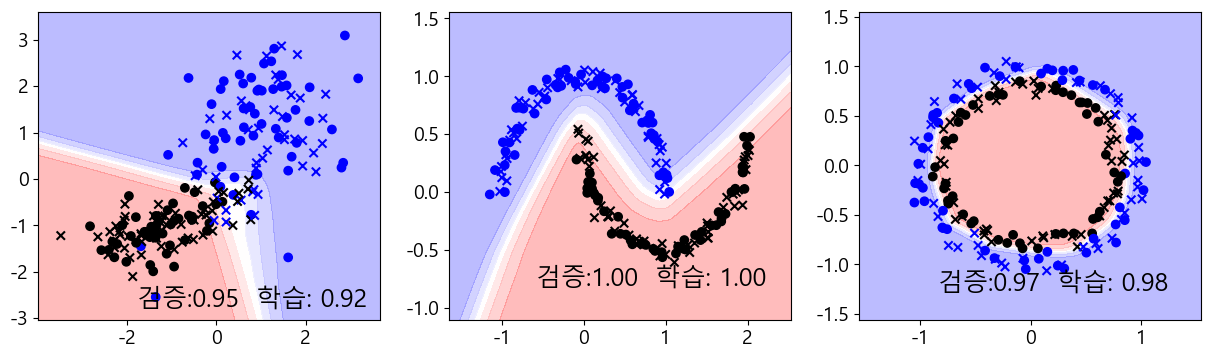

In [73]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

두 번째와 세 번째 예제 데이터의 검증 데이터에 대해서도 거의 100%의 정확도가 나옴.
이는 과적합이 아니라 일반화 성능이 높은 모델을 구축했다는 의미이며
신경망(딥러닝 모델)의 뛰어난 일반화 성능을 보여줌.

## 6. 결정 트리

결정 트리 구조 자체를 그래프로 그려봄.

### 1) 아이리스 데이터 집합으로 결정 트리 그래프 그리기

In [74]:
# 추가 라이브러리 임포트
import seaborn as sns

# 예제 데이터 읽어 들이기
df_iris = sns.load_dataset('iris')

# 데이터 범위 2종으로 축소
df2 = df_iris[50:150]

# 데이터 분리
X = df2.drop('species', axis = 1)
y = df2['species']

In [92]:
# 'GraphViz's executables not found' 오류 발생시에는
# https://graphviz.org/download/ 에서 환경에 맞는 버전의 Graphviz를 설치하고
# 아래 코드의 <설치경로>를 자신이 Graphviz를 설치한 경로로 수정한 후 진행.
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz-12.1.2-win64/bin'
# os.environ["PATH"] += os.pathsep + '<설치경로>'

In [93]:
# 학습
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X,y)

DecisionTreeClassifier(random_state=123)

In [94]:
# 결정 트리를 그래프 구조로 출력
from sklearn import tree

with open('./iris-dtree.dot',mode = 'w') as f:
    tree.export_graphviz(algorithm, out_file = f, 
                         feature_names = X.columns, 
                         filled = True, 
                         rounded = True, 
                         special_characters = True, 
                         impurity = False, 
                         proportion = False)


In [95]:
# !pip install pydotplus
import pydotplus
from IPython.display import Image


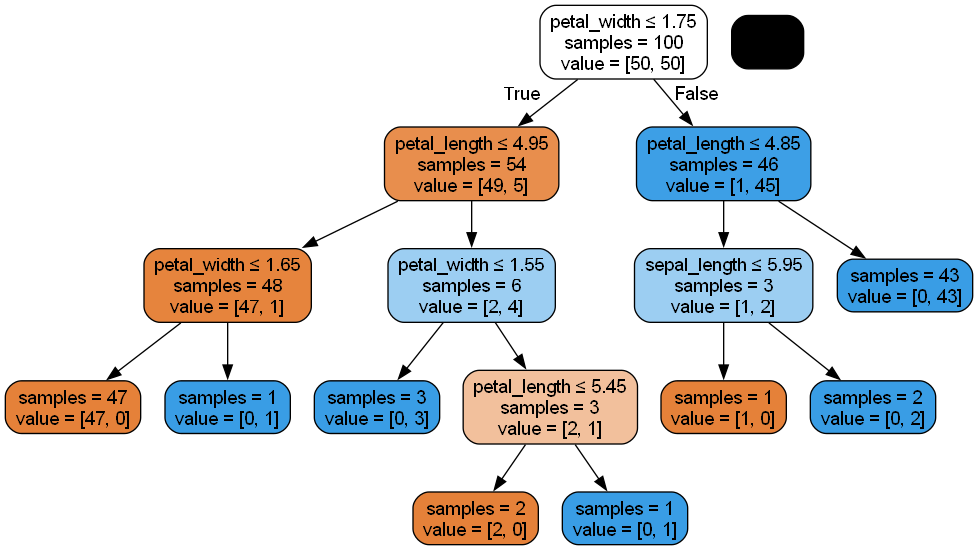

In [91]:
import graphviz
graph = pydotplus.graphviz.graph_from_dot_file('./iris-dtree.dot')
graph.write_png('./iris-dtree.png')
Image(graph.create_png())

아이리스 데이터 집합을 읽어 들인 뒤, 원래 세 가지 종의 데이터를 두 가지 종의 데이터로 추려내는 낸후
이 데이터로 결정 트리 모델을 학습한 뒤 트리의 분기 구조를 그래프 구조로 출력.

맨 위에 있는 흰색 사각형의 경우 사각형 속 세 번째 줄의 value는 현재 분기에 내려온 데이터 중 두 그룹에 속하는 수를 나타냄.
[50, 50]이라고 나왔으므로 초기 상태에는 두 그룹의 데이터가 50개씩 있음을 알 수 있음.

아이리스 데이터 집합에는 petal_length (꽃잎 길이), petal_width (꽃잎 폭), sepal_length (꽃받침 길이), sepal_width (꽃받침 폭) 네 개의 필드가 있음.
그 중 먼저  petal_width (꽃잎 폭) 필드를 기준으로 필드 값이 1.75보다 작은지를 두고 첫 번째 분류를 수행하는 것이 맨위 사각형의 의미.

두 번째 사각형에는 value가 각각 [49, 5], [1, 45]로 되어 있어서 첫 번째 분류에서 이미 상당 부분 깔끔하게 분류가 되었음.

그 아래의 처리도 같은 식으로 서브 그룹의 1) 대상 필드와 2) 역치를 설정한 후 역치를 기준으로 더 세세하게 분류를 해나감.
이 과정이 결정 트리의 기본 처리 방식.

만약 사람에게 "아이리스 데이터 집합에서 종을 분류할 규칙을 만들라"고 한다면 아마도 비슷한 규칙을 만들 것.
이런 의미에서 결정 트리는 사람이 이해하기 쉬운 알고리즘.

머신러닝에서는 1) 판단 대상 필드와 2) 기준이 되는 역치 값을 자동으로 설정하는 부분에서 머신러닝이 개입.
이 판단 기준을 결정하는 방식에도 여러 가지가 있어서 사이킷런 라이브러리에서는 criterion이라는 파라미터에서 원하는 방식을 선택.
기본 값은 '지니 불순도 Gini impurity'를 의미하는 gini.

### 2) 결정 트리를 이용한 분류 결과와 산점도

In [193]:
# 알고리즘 선택하기
from sklearn.tree import DecisionTreeClassifier

algorithm = DecisionTreeClassifier(random_state=random_seed)
print(algorithm.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 123, 'splitter': 'best'}


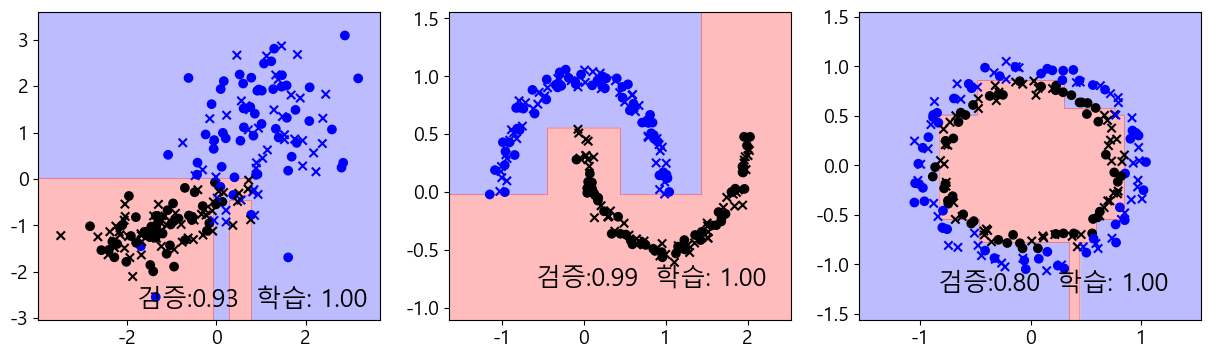

In [194]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

모델의 특성상 결정 경계를 볼 수 없으므로 경계선을 표시하지 않음

다른 알고리즘의 결정 경계와 비교하면, 다음과 같은 결정 트리의 성질을 알 수 있음.   
* 서포트 백터 머신(커널)과 마찬가지로 원형의 결정 경계를 구할 수 있음   
* 서포트 백터 머신(커널)의 경계선이 완만한 곡선이었는데 비해, 결정 트리의 경계선은 직사각형을 조합해 만든 형태를 보임.   
* 이상값이 있어도 억지로 짜 맞추는 규칙을 만들어 내므로 경계선이 부자연스러워지는 경우가 생김.

마지막에 성질은 결정 트리 알고리즘으로 모델을 구축할 때 특히 주의할 점.
이와 같이 이상값에 필요 이상으로 적합한 모델이 학습되는 것을 "과적합"이라고 함.
과적합은 머신러닝에서 가장 피해야 할 현상으로, 과적합이 발생하면 학습 데이터 외에 처음 보는 데이터에 대한 정확도가 오히려 낮아짐.
첫 번째 데이터를 보면 학습 데이터에 대한 정확도는 100%인데 검증 데이터에 대한 정확도는 93%로 낮음.
이런 현상은 과적합 때문에 발생하고, 결정 트리에서도 트리 구조가 깊어질수록 과적합의 위험이 높아짐.
이에 대비해 트리 깊이의 최대값을 미리 설정할 수 있도록 하고 있고, 이에 사용되는 파라미터가 max_depth.

### 3) 결정 트리를 이용한 분류 결과와 산점도(max_depth=3으로 설정)

In [195]:
# 알고리즘 선택하기
algorithm = DecisionTreeClassifier(max_depth = 3, random_state=random_seed)

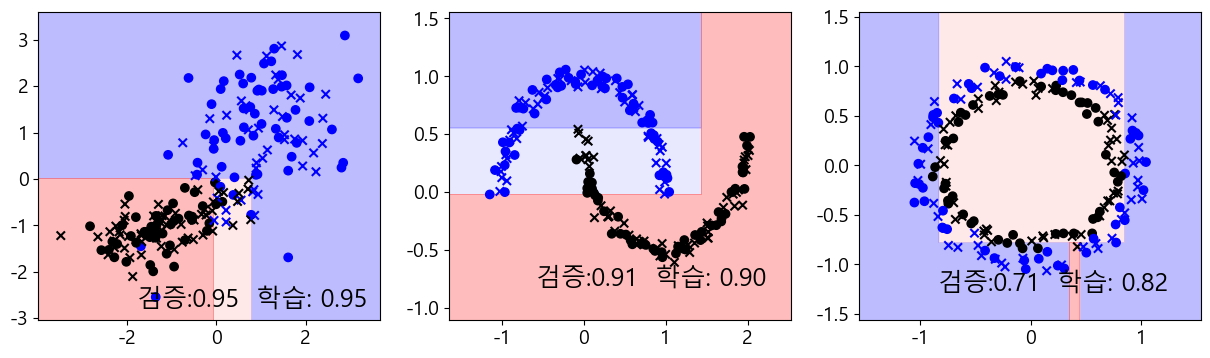

In [196]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm,DataList)

결과를 보면 첫 번째 데이터의 경우 학습 데이터 대한 정확도가 95%로 떨어졌지만, 검증 데이터에 대한 정확도는 거꾸로 95%로 상승.
이런 현상의 원인은 과적합이 완화되면서 모델의 일반화 성능이 향상됐기 때문.
반면 세 번째 데이터의 경우 경계선이 데이터와 맞지 않아서 검증 데이터에 대한 정확도가 86%에서 74%로 떨어짐.
이러한 결과에서 알 수 있듯이 max_depth 값은 데이터에 따라 케이스-바이-케이스 case by case 로 최적의 값을 결정해야 함.
이 점은 결정 트리 외 다른 알고리즘의 튜닝 파라미터에 대해서도 마찬가지.

## 7. 랜덤 포레스트

결정 트리는 어떤 성질의 데이터도 유연하게 대응할 수 있는 것이 특징이지만, 과적합을 일으키기 쉬움.
이러한 단점을 극복하기 위한 아이디어에서 제안된 것이 랜덤 포레스트.
랜덤 포레스트의 바탕이 되는 아이디어는 "약분류기 weak classifier"라는 간단한 분류기를 여러 개 만들고
그 분류 결과의 다수결로 최종 판단을 내리자는 것.

첫 단계는 원 학습 데이터에서 표본 데이터를 N세트 (N은 약분류기의 수)를 만듬.
표본을 추출할 때 데이터 중복을 허용하는 방법을 부트스트래핑 이라고 하는데, 이 방법을 사용.
* 부트 스트래핑 : 실제 표본 데이터와 약간씩 다른 데이터를 만들어 여러 개의 새로운 데이터 집합을 구성하는 기법으로 통계학에서 많이 사용.

다음 단계는 세트마다 분류에 사용할 변수를 무작위로 추려내 그 상태로 결정 트리를 N개 학습하는 것.
당연하지만, 이렇게 학습한 분류기는 정확도가 떨어짐. 이렇게 만든 분류기를 약분류기라고 부르는 것은 이 때문.

하지막 약 분류기의 결과를 모두 모아 다수결로 최종 결과를 결정하면 전체적으로 정확도가 높은 분류 결과가 나온다고 알려져 있음.
랜덤 포레스트의 뜻이 무작위로 추려낸 여러 개의 결정 트리가 숲을 이룬다는 의미.
언뜻 생각하면 쓸데없이 복잡하기만 한 것 같지만, 단순한 결정 트리와 비교하면 과적합을 잘 일으키지 않는 모델.

In [197]:
# 랜덤 포레스트를 이용한 분류 결과와 산점도

# 알고리즘 선택하기
from sklearn.ensemble import RandomForestClassifier

algorithm = RandomForestClassifier(random_state=random_seed)
print(algorithm.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}


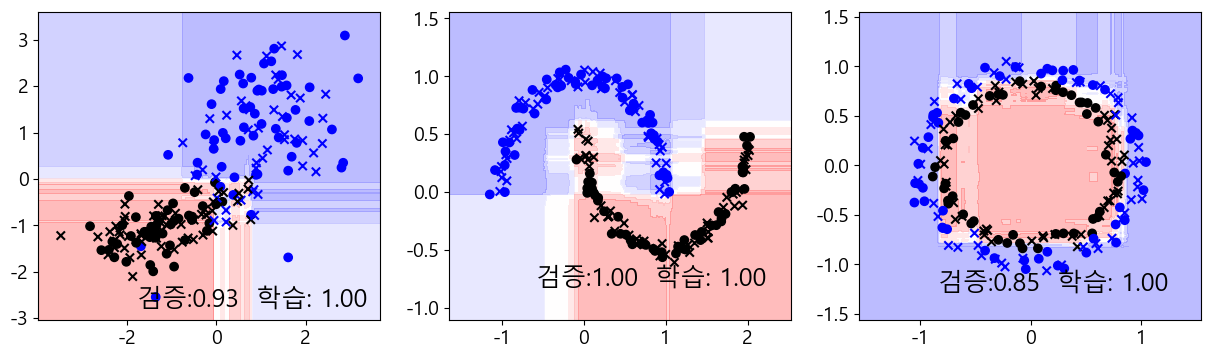

In [198]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm, DataList)

회색과 파란색이 이루는 경계를 중심으로 각 그림을 살펴보면 경계선이 자연스러워진 것을 알 수 있음.

## 8. XGBoost

XGBoost는 eXtreme Gradient Boosting의 약자로, 2014년 제안된 알고리즘.
최근 캐글(Kaggle) 등 머신러닝 모델 콘테스트에서 널리 사용.
알고리즘의 구체적인 내용은 복잡.

XGBoost를 아주 간단히 설명하면, 분류의 여러 개의 결정 트리를 사용하는 기법인 "앙상블"과 "배깅", "부스팅"을 결합한 알고리즘.
배깅 bagging은 서로 무관한 약분류기를 병렬로 만들어 그 분류 결과를 다수결로 최종 결과를 결정하는 기법.
랜덤 포레스트가 바로 배깅이 적용된 결정 트리.

부스팅 boosting 역시 여러 개의 분류기를 사용한다는 점은 배깅과 같지만,
배깅이 "여러 개의 분류기를 서로 무관하게 학습" 시키는 데 반해,
부스팅은 "바로 전 분류기의 결과를 기초로 다음 분류기를 학습"한다는 점이 차이.

첫 번째 분류기는 일반적인 방법으로 학습. 이 분류기의 예측 결과는 정답 데이터와 차이가 있을 것이고 이 차이를 계산.
그 다음 분류기는 앞에서 구한 오차1을 예측하게 학습.
이런 방식으로 분류기를 여러 개 만든 다음, 그 결과를 겹쳐 가며 더 하는 방법으로 최종 분류기를 만듬.

XGBoost의 실제 학습 원리는 이보다 훨씬 복잡하지만, 학습이 진행되는 개념적인 형태는 위와 같음.

In [199]:
# !pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/124.9 MB 8.5 MB/s eta 0:00:15
   ---------------------------------------- 0.9/124.9 MB 11.6 MB/s eta 0:00:11
   ---------------------------------------- 1.5/124.9 MB 11.8 MB/s eta 0:00:11
    --------------------------------------- 1.8/124.9 MB 10.5 MB/s eta 0:00:12
    --------------------------------------- 2.2/124.9 MB 10.8 MB/s eta 0:00:12
    --------------------------------------- 2.7/124.9 MB 10.2 MB/s eta 0:00:13
    --------------------------------------- 2.8/124.9 MB 10.0 MB/s eta 0:00:13
    --------------------------------------- 2.8/124.9 MB 10.0 MB/s eta 0:00:13
    --------------------------------------- 2.8/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 3.5/124.9 MB 7.7 MB/s eta 0:00:16
   - -------------------------------------- 4.0/124.9 MB 8.0 MB/s eta 0:00:16
   - -------------------------------------- 4.4/124.9 MB 8.1 MB/

In [200]:
# 알고리즘 선택하기
import xgboost

algorithm = xgboost.XGBClassifier(random_state = random_seed)
print(algorithm.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 123, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


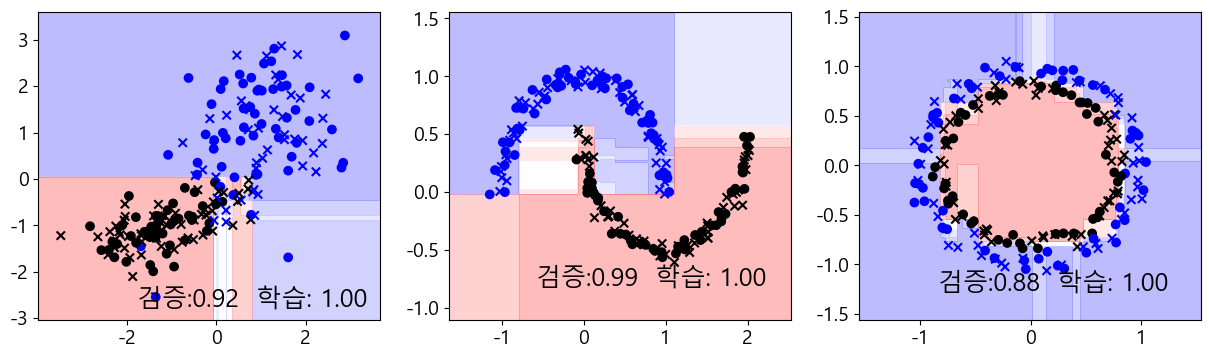

In [201]:
# 결과 표시 함수를 호출
plot_boundaries(algorithm,DataList)

XGBoost는 파라미터가 여러 개 있어서 파라미터의 값을 적절히 설정하지 못하면 정확도가 나오지 않음.
이번 결과에서 오른쪽 데이터에 대한 정확도가 그리 높지 못한 것도 이 때문.
하지만 나머지 두 데이터는 검증 데이터까지 높은 정확도가 나옴.

## 9. 알고리즘을 선택하는 방법

무슨 알고리즘을 써야 할까?에 대한 물음에 간단히 답하기는 어려움.

### 1) 모델의 판단 근거를 알고 싶다.

모델의 판단 근거를 아는 것도 알고리즘을 선택하는 중요한 기준 중 하나.
알고리즘 중 로지스틱 회귀와 결정 트리는 모델의 구조가 단순한 만큼 "모델의 예측 결과가 도출되는 과정"을 사람이 쉽게 이해할 수 있음
머신러닝을 활용할 업무가 이러한 점을 중시하는 업무라면 로지스틱 회귀와 결정 트리가 유리.

### 2) 정확도가 놓은 모델

"모델이 판단하는 이유는 몰라도 되지만, 가능한 한 정확한 예측 결과가 필요"한 경우
서포트 벡터 머신(커널), 신경망, 랜덤 포레스트, XGBoost 같은 알고리즘을 주로 선택.
최대한 정확도가 높은 모델이 필요한 상황에서는 같은 데이터로 여러 개의 모델을 학습해 정확도를 비교한 뒤 가장 뛰어난 것을 선택하는 방법이 표준,
구체적인 방법으로는 교차 검증, 그리드 서치 등의 기법이 있음.

### 3) 학습에 걸리는 시간

예제 데이터는 데이터 건수나 필드 수가 적기 때문에 학습 시간이 그리 오래 걸리지 않았음.
그러나 실제 프로젝트에서 다루는 학습 데이터는 경우에 따라 많게는 수천만건, 필드 수도 수백에서 수천에 이르는 경우가 있음.
이런 경우에는 학습에 걸리는 시간도 알고리즘을 선택하는 기준이 될 수 있음.
알고리즘이 간단한 로지스틱 회귀와 결정 트리가 그만큼 학습 시간도 짧기 때문에 유리.

# 04. 평가

평가 역시 머신러닝 모델을 만드는 과정에서 중요한 역할을 담당.

## 1. 혼동행렬

### 1) 혼동행렬 confusion matrix

유방암 예측 모델을 정리해 보면, 학습 데이터 건수는 양성이 357건, 악성이 212건.
맨 처음 학습했던 입력변수가 2개인 모델은 정확도가 87.72%를 보임.

그러나 실무 관점에서 이 모델을 생각해보면, "악성을 가능한 한 놓치지 않고 탐지하는 것이 가장 큰 목적"이며,
이에 비해 "비교적 수가 적은 양성을 악성으로 예측하는 것은 중요도가 낮다"는 것을 알 수 있음.
거기다 예측이 틀린 상황에는 "모델이 악성을 예측했으나 양성이었던" 상황과
"모델이 양성을 예측했으나 악성이었던" 상황 이렇게 두 가지 경우의 수가 있지만,
그 중에서도 후자의 상황이 훨씬 치명적임.

모델의 예측 결과는 "악성"과 "양성" 두 가지이고, 정답 데이터는 "악성"과 "양성" 두 가지가 있어
예측 결과와 정답 데이터의 조합은 모두 네 가지가 있을 수 있음.
이 "네 가지 패턴의 건수를 집계해 표 형태로 정리"하면 단순히 정확도(정답률)만 따지는 것 보다 더 의미 있는 검증이 가능.

유방암 진단 예측 모델의 혼동 행렬
                         예 측 결 과
                    양성            악성
정답 데이터    양성     101            2
            악성      19            49

숫자를 일반화해서 문자로 바꿔쓰면
                       예 측 결 과
                   음성            양성
정답 데이터   음성     TN             FP
           양성     FN             TP

양성 positive은 모델이 찾아내는 대상. 유방암 데이터 집합에서는 '악성'이 해당
음성 negative은 양성 positive의 반대이며 유방암 데이터 집합의 '양성'이 해당.

TP true positive
모델의 예측 결과 양성 positive이 정답 true 였던 건수

FP false positive
모델의 예측 결과 양성 positive이 오답 flase 였던 건수

FN false negative
모델의 예측 결과 음성 negative이 오답 false 였던 건수

TN true negative
모델의 예측 결과 음성 negative이 정답 true 였던 건수

기호이지만 "두 번째 글자가 예측 결과, 첫 번째 글자가 예측 결과의 정답여부"라로 기억.

혼동행렬은 분류 평가에서 가장 기본이 되는 표.

### 2) 혼동행렬 구현하기

혼동 행렬을 작성하려면 먼저 머신러닝 모델을 구축하고, 검증 데이터에 대한 예측 결과를 만들어야 함.
유방암 진단 데이터를 사용.

In [203]:
# 데이터 읽어 들이기 및 데이터 분할
# 라이브러리를 임포트
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 데이터를 내려받기

x = cancer.data # 입력 데이터 x
y = 1 - cancer.target # 정답 데이터 y
# 양성 : 0, 악성 : 1이 되도록 값을 변경
# 찾으려는 데이터를 positive 1로 변경

# 입력 데이터를 2차원으로 추려낸다(평가가 목적이여서 입력 변수를 2개로 줄인다.)
x2 = x[:, :2]
x2

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       ...,
       [16.6 , 28.08],
       [20.6 , 29.33],
       [ 7.76, 24.54]])

In [204]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x2,y,
                                                train_size=0.7,
                                                test_size= 0.3,
                                                random_state=random_seed)
# 이전 작업에서는 데이터 확인 단계를 밟기 위해 읽어 들인 상태의 넘파이 배열로 된 학습 데이터를 데이터프레임으로 변환.
# 이번에는 최단 코스로 예측 결과를 만들 수 있게 데이터프레임 변환은 생략하고 넘파이 배열로 된 데이터를 가지고 바로
# 학습 및 예측에 들어감.

# y = 1 - cancer.target의 경우
# 원래 데이터의 집합에서는 정답 데이터 값 "1이 양성", "0이 악성".
# 단순히 값을 예측하고 정확도를 측정하는 것만이 목적이라면 어느 쪽을 1로 나타내고 상관없지만,
# 평가에서 이진값을 양성 positive 와 음성 negative로 구분.
# 일반적으로는 찾아내려는 현상을 양성 positive = 1이 되게 하기 때문에 정답 데이터에서 1과 0을 뒤집어 악성 = 양성 - 1이 되게 함.

In [205]:
# 알고리즘 선택 및 평가
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

algorithm = LogisticRegression(random_state=random_seed)

algorithm.fit(X_train,y_train) # 학습
y_pred = algorithm.predict(X_test) # 예측

In [206]:
# 평가
score = algorithm.score(X_test,y_test)

print(f'score: {score:.4f}') # 결과 확인

score: 0.8772


In [207]:
# 혼동행렬 계산하기

# 필요한 라이브러리를 추가 임포트
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix # 결과 확인

array([[101,   2],
       [ 19,  49]], dtype=int64)

In [87]:
# confusion_matrix 함수의 사용법은 간단해서 정답 데이터 y_test, 예측 결과 y_pred 두 개의 인자를 전달하기만 하면 됨.
# 반환 값은 2차원 넘파이 배열로, print 함수를 이용해 바로 출력 할 수 있음.

# 숫자로 된 행렬로는 의미를 이해하기 어려워, 혼동행렬을 출력하는 함수 make_cm를 정의.

# 혼동행렬을 깔끔하게 출력하는 유틸리티 함수


In [88]:
# make_cm 함수를 사용해 혼동행렬 출력하기


## 2. 정확도, 정밀도, 재현율, F-점수

### 1) 정확도 accuracy

정확도란 정답률을 의미.
엄밀하게 설명하면 모델의 예측 결과에서 "정답을 맞힌 수를 전체 건수로 나눈 값"

                   예측 결과
                   양성  악성
 정답 데이터 양성     101   2
             악성      19  49

| |    | 예측 결과 ||
|---|----|------:|-------:|
| |    |    양성 |     악성 |
| 정답 데이터 | 양성 |   101 |      2 |
| | 악성 |    19 |     49 |

전체 건수 : 101 + 2 + 19 + 49 = 171건
정답 수 : 101 + 49 = 150건
따라서 정확도는 정답수 / 전체 건수 = 150 / 171

                          예 측 결 과
                      음성            양성
정답 데이터    음성      TN             FP
               양성      FN             TP

구체적인 계산식을 공식으로 만들면
전체 건수 = TP + FP + FN + TN
정답 수 = TP + TN
정확도 = (TP + TN) / (TP + FP + FN + TN)

* 탐지하려는 대상이 특정한 값인 경우

케이스 1
                  예측 결과
                  양성  악성
정답 데이터 양성     95    0
         악성      5    0

케이스 2
                  예측 결과
                  양성  악성
정답 데이터 양성     87    8
         악성      3    2

두 케이스의 경우 전체 건수 100건중 탐지하려는 대상인 악성이 전체의 1/20에 불과한 5건으로 매우 적음.

분류 모델에서 탐지 대상 (양성 positive)의 건수가 그렇지 않은 대상 (음성 negative)에 비해 적은 경우가 흔함.
예를 들면, 영업 계약 성공 예측이나 상품의 결함 탐지.

두 케이스의 경우 모델을 정확도로만 평가 하면 케이스 1은 정확도 95%
케이스 2는 정확도가 89%
정확도만 보자면 케이스 1이 더 우세한 모델 같지만 탐지하려는 대상인 악성을 한 건도 발견하지 못함.
케이스 1은 모든 입력에 대해 양성을 예측하는 사실상 아무 일도 하지 않는 모델.
케이스 2는 상대적으로 오류가 많지만 탐지하려는 악성을 2건이나 발견해 케이스 1보다는 나은 모델.

이렇듯 특정한 예측 결과만을 얼마나 정확하게 예측했는가를 알아보는 지표값이
정밀도 precision, 재현율 recall, F1-점수
이들 지표는 특히 예측 결과의 비율이 불균형일때 더 중요한 의미를 가짐.

### 2) 정밀도 precision

모델이 양성 positive 이라고 예측한 대상 중에서 진짜로 양성인 건수의 비율
정밀도 = TP / (TP + FP)

영업 계약 성공 예측 모델의 혼동행렬
                  예측 결과
                 실패   성공
정답 데이터 실패    15593  376
         성공    1341  775

위 모델의 목적은 예측 결과를 이용해 성공 가능성이 높은 영업 대상 고객을 추려내 영업 효율을 높이는 것.
정답 데이터의 실패가 15,569건 (15593 + 376), 성공이 2,116건 (1341 + 775).
검증 데이터를 아무 필터링 없이 무작위로 영업을 시도했을 때의 성공률은 11.7% = 2116 / (15569 + 2116).

이에 비해, 모델을 이용해 성공가능성이 높은 고객을 추려낸 후 영업을 시도한 경우의 성공률은
67.3% = 775 / (775 + 376).
가능성이 높은 고객을 미리 추려냄으로써 영업 성공률이 대폭 상승,
여기서 모델이 가능성 높다고 판단한 고객 중 영업에 성공한 고객의 비율이 바로 정밀도에 해당.

### 3) 재현율 recall

실제 양성 positive이었던 데이터 중 모델이 양성으로 판정한 건수의 비율
재현율 = TP / (TP + FN)

재현율이 유용한 사례가 바로 예제로 사용하는 유방암 진단 예측 모델.
앞의 케이스의 경우를 보면 악성(양성, positive)을 한 건도 탐지 못한(하는 일이 없는) 모델과 5건의 악성 중 2건을 탐지해 낸 모델이 나옴.
이들 모델의 재현율은 각각 0%와 40%. 케이스 2가 정확도는 떨어지지만, 재현율에서는 앞섬.
이 사례는 재현율로 모델의 우열을 판단해야 하는 사례.

영업 계약 성공 예측 모델의 경우, 검증 데이터에서 실제로 계약으로 이어진 고객 2,116명 (1341 + 775) 중
영업 가능성이 높은 고객이 775명을 차지했으니 이 모델의 재현율은 33.6%.

예를 들어, 이 모델에서 계약성공 가능성이 높다고 예측한 고객에게만 영업을 시도하니 일거리가 없는 영업사원이 생김.
이런 경우에는 영업 시도 후의 성공률(정밀도)이 떨어지더라도 더 많은 고객에게 영업을 시도해 계약으로 이어지는 건수를 늘여야 함.
다시 말하면 이 모델에서도 재현율은 잠재적 계약 가능 고객을 의미하는 중요한 지표가 됨.

### 4) F1-점수 F1-score

업무상 중요한 의미를 갖는 양성 positive 값이 존재하고 이에 대한 예측 결과를 중시해야 하는데,
정밀도나 재현율처럼 어느 한쪽만 고려하는 평가 기준 대신 양쪽을 균형있게 고려하는 지표가 필요한 경우에 적합.

정밀도와 재현율의 중간 정도가 되게 계산한 값.
이 값이 최대가 되는 모델은 "정밀도와 재현율이 고르게 최적화됐다"고 할 수 있음.
F1 = 2 * (정밀도) * (재현율) / (정밀도 + 재현율)

### 5) 어떤 경우에 어떤 지표를 사용해야 할까?

a) 정확도 accuracy
정답 데이터에 양성 positive과 음성이 고르게 분포하고, 업무적으로도 양성과 음성 중 어느 쪽이 특히 중요하지 않은 경우.
예를 들어 아이리스 데이터 집합을 대상으로 붓꽃의 종류를 분류하는 모델을 구축하는 경우가 이에 해당.

반대로 양성 positive을 검출하는 것이 업무적으로 중요한 경우, 특히 정답 데이터가 불균형한 분포을 보인다면 정확도 대신
아래의 세 가지 지표 중 하나를 선택하는 것이 좋음.

b) 정밀도 precision
양성 positive인 데이터의 예측 결과가 얼마나 정확한지가 업무 효율과 직결되는 경우.
영업을 통한 계약 성공 여부를 예측하는 모델.

c) 재현율 recall
고장 등 문제가 있는 현상을 방지하려는 경우 (양성 positive을 늦지 않게 발견) .
예를 들어 질병이나 질환의 진단. 영업 인원이 충분한 상황의 계약 성공 예측 모델.

d) F1-점수
예측 결과 중 양성 positive이 업무적으로 중요해서 정확도는 사용할 수 없지만,
정밀도나 재현율에 치우치지 않고 양자를 균형있게 평가를 원하는 경우.

### 6) 파이썬으로 정밀도, 재현율, F-점수 계산하기

In [89]:
# 라이브러리 임포트


## 3. 확률값과 역치

### 1) 확률값과 역치의 관계

분류 모델에서는 예측 결과가 확률이고, 이 값이 0.5보다 큰지 작은지를 기준으로 0, 1을 출력하게 만들어진 알고리즘이 많음.
역치가 0.5일 경우 확률값이 0.631 이면 예측 결과는 1이 됨.
하지만 역치를 0.7로 바꾸면 예측 결과가 0으로 바뀜

구축한 모델의 확률값을 추출해 역치를 변경하는 방법으로 예측 결과를 제어하는 방법을 알아봄.

### 2) 확률값 구하기

분류 알고리즘에는 예측 결과를 구하는 predict 함수 외에도 확률을 제공하는 predict_proba 함수가 있음.
predict_proba 함수의 반환 값은 입력변수의 건수가 N이라고 할때, N행 2열의 모양을 가진 넘파이 배열.
넘파이 배열의 첫 번째 컬럼은 예측 결과가 0일 확률, 두 번째 컬럼은 예측 결과가 1일 확률.

분류 모델은 y=0일 확률과 y=1일 확률을 합하면 1이됨.
여기서 판단 대상이 되는 것은 양성 (positive, y = 1)인 결과.
그러므로 두 확률 중에서 오른쪽 값만 추출.

In [90]:
# 확률값 확인하기


정답데이터 y_test, 예측결과 y_pred, 추출한 확률값 y_proba1을 비교. 세 변수에서 11번째 부터 10건의 데이터를 출력
y_pred의 값을 보면 12번째와 15번째 모두 1인것 확인.
하지만 y_proba1의 값을 보면 12번째는 0.9188, 15번째는 0.631이므로 12번째 예측 결과의 확신도가 더 높다는것을 알수 있음.

예를 들어 역치를 0.7까지 올렸다면 15번째 예측 결과는 0으로 바뀌지만, 12번째 예측 결과는 그대로 유지.
이것이 역치를 통해 모델의 예측 결과를 바꾸는 기본적인 방법.

In [91]:
# 역치를 조정해 예측 결과를 바꾸기


y_proba1[10:20]에 대해 역치를 0.5와 0.7로 달리해서 적용해 비교.
비교 결과로 나온 배열(True/False 값으로 구성)의 astype(int) 함수를 호출하면 True는 1, False는 0으로 각각 변환.

thres = 0.5인 경우에는 y_pred와 완전히 같은 결과가 나옴.
반면 thres = 0.7 인 경우에는 5번째 요소의 결과가 달라짐. 확률값이 0.631이었으므로 역치가 0.7이면 0으로 판정.

In [92]:
# 위의 결과를 바탕으로 역치를 변경할 수 있는 예측함수를 정의.


In [93]:
# 결과 확인


## 4. PR곡선과 ROC곡선

역치를 변화시켰을 때의 정확도 변화를 그래프로 그려 만든 곡선을 통해 모델의 성능을 알아보는 기법으로 PR 곡선과 ROC 곡선이 있음.

### 1) PR곡선

모델 내부의 역치를 변화시키면 모델의 정밀도와 재현율이 함께 변화.
모델 내부의 역치를 변화시켰을 때 일어나는 정밀도와 재현율의 변화를 그래프로 그려 이 곡선을 이용해
모델의 정확도를 평가하려는 곡선을 PR 곡선 precision-recall curve.

역치의 변화에 따른 정밀도와 재현율의 값을 구하기 위해 배열 생성.
PR 곡선을 그리기 위한 배열을 생성

In [94]:
# 라이브러리 임포트


In [95]:
# 역치 0.5 주변의 값을 출력


사이킷런 라이브러리에서 제공하는 precision_recall_curve 함수를 정답 데이터 y-test와 예측 확률값 y_proba1을 인자로
호출하면 정밀도와 재현율, 역치의 배열을 함께 반환.
반환된 코드를 데이터프레임으로 변환한 후 그 전치 행렬을 만들어 열의 제목을 추가.

역치 0.5에 해당하는 줄을 포함하는 8줄을 추출해 출력.
120행을 보면 0.5가 되는 줄인데, 이 줄의 정밀도와 재현율이 각각 0.9608과 0.7206으로 이전에 구한 값과 동일.
역치를 0.5보다 크게 하면 재현율을 낮아지고 정밀도는 높아지는 경향을 확인.
(검증 데이터의 내용에 따라 그렇지 않을 수도 있음.)

In [96]:
# PR 곡선 그리기



그래프를 그리는 데는 일반적으로 plot함수를 사용하지만, 여기서는 fill_between 함수를 사용.
이름 그대로 그래프 영역을 색으로 채워 출력하는 함수.
그래서 중요한 것은 색이 칠해진 영역의 면적.
면적이 1에 가까울수록 모델의 정확도가 높아지는 경향을 보이므로 모델 성능의 지표와 같은 역할을 하기 때문.

In [97]:
# PR 곡선 아래 영역의 면적 계산


사이킷런에는 면적을 계산하는 auc (area under the curve) 함수가 있음.
일반적으로 면적이 0.9 이상이면 성능이 좋은 모델.

### 2) ROC 곡선

역치를 변화시켰을 때 일어나는 모델의 변화를 그린 그래프라는 점에서는 PR곡선과 같지만, 지표값을 계산하는 방식에 조금 차이가 있음

ROC 곡선의 경우 민감도와 위양성률을 기준으로 함.
정답 데이터에 따라 데이터를 양성과 음성 두 그룹으로 나누고,
모델의 확률값을 기초로 양성과 음성의 도수 분포 그래프를 그림.
민감도는 '양성 그래프의 면적' 중 역치보다 큰 부분의 비율.
위양성률은 '음성 그래프의 면적' 중 역치보다 큰 부분의 비율.

식으로 나타내면
민감도 = TP / (TP + FN)
위양성률 = FP / (FP + TN)
민감도는 재현율과 동일.
PR 곡선처럼 역치를 변화시켰을 때 민감도와 위양성률의 변화 양상을 그래프로 그린것이 ROC 곡선.

In [98]:
# ROC 곡선을 그리기 위한 배열을 생성. 민감도와 위양성률 구하기


정답 데이터 y_test와 모델이 출력한 확률값 y_proba1을 인자로 roc_curve 함수를 호출하면 배열을 만들어 줌.
drop_intermediate=False의 경우 False로 하지 않으면 역치의 변화에 따라 위양성률과 민감도가 변화하지 않으면 해당 역치값 부분이 생략.
역치의 변화에 따른 위양성률과 민감도의 추이를 살피는 것이 목표라서 인자를 False 로 설정.
결과로 출력된 표를 보면, 역치가 낮아질수록 위양성률과 민감도가 함께 증가.

In [99]:
# ROC 곡선 그리기


점(0, 0)과 (1, 1)을 잇는 점선이 있는데 이 점선은 최악의 모델을 나타내는 선.
모델의 예측 결과가 양성 positive과 음성으로 분류하는 데 전혀 도움이 되지 않는 경우 이 점선이 ROC 곡선이 됨.
반대로 정확도가 100%인 모델은 ROC곡선이 점(0, 1)을 지나므로 정사각형 전체가 색으로 채워짐.
색칠된 영역의 넓이가 최악인 모델은 0.5, 최선의 모델은 1.0 범위가 되므로 이를 통해 모델의 성능을 판단할 수 있음.

In [100]:
# 성능이 뛰어난 모델의 ROC 곡선 그리기. 유방암 진단 예측 모델의 수정 버젼. (입력변수의 수를 원래의 30개로 늘임)


In [101]:
# ROC 곡선 그리기


In [102]:
# ROC 곡선 아래의 면적을 계산


## 5. 입력 필드의 중요도

모델의 정확도를 알아보는 다양한 기법중의 하나가 "입력 필드의 중요도"
어떤 필드가 얼마나 예측에 관여하는가를 알아봄.

예를 들어 여러 개의 센서로부터 입력받는 데이터를 이용해 어떤 기계의 고장을 예측하는 모델이 있는 경우,
만약 센서 B의 출력이 고장 예측 모델에 가장 크게 관여한다는 것을 알았다면
센서 B와 관련된 부품에 제일 관심을 가져야 함.
어쩌면 이 부품을 개선에 고장이 잘 안나게 할 수도 있음.
이렇듯 입력 데이터의 예측 모델에 대한 관여도가 업무를 개선하는 대책의 실마리가 되는 경우가 많음.

결정 트리 타입의 알고리즘은 모델의 내부 변수를 조사하는 방법으로 중요도를 알 수 있음.

In [103]:
# 랜덤 포레스트 모델 생성까지


In [104]:
# 알고리즘 선택 (랜덤 포레스트)


In [105]:
# 중요도 벡터 계산하기


In [106]:
# 필드명이 키인 Series 객체를 생성


In [107]:
# 막대그래프로 중요도 나타내기


In [108]:
# 결정 트리 모델로 입력 필드의 중요도 조사.


In [109]:
# XGBoost로 입력 필드의 중요도 조사.


세 개의 그래프를 살펴보면 공통으로 다음과 같음 특징을 알 수 있음.
* 꽃잎 길이, 꽃잎 폭의 순서로 중요도가 높음
* 꽃받침 폭과 꽃받침 길이는 거의 예측 결과에 기여하지 못함.

이러한 특징에 따라 "예측의 대부분은 꽃잎 길이와 꽃잎 폭을 근거로 이뤄진다"로 결론을 내릴 수 있음.

입력 필드의 중요도 분석은 상황에 따라 모델의 정확도보다 더 중요할 수도 있음.
예를 들어 제품의 결함이나 기계의 고장을 예측하는 모델을 만들었다면
이 모델의 입력 필드를 분석하면 결함이나 고장의 원인을 추정할 수 있으므로 품질을 개선할 수 있는 단서가 됨.

## 06. 회귀 모델을 평가하는 방법

### 1) 분류와 회귀 모델의 차이점

입력이 동일해도 출력이 0과 1(분류)로 정해져 있거나 숫자로 출력(회귀) 할 수 있음.

### 2) 회귀 모델 평가가 어려운 이유

분류는 결국 맞느냐 틀리냐의 두 가지 결론 뿐이라 정답 데이터와 예측 결과가 모두 0또는 1이므로 여러가지 "비율"을 쉽게 계산할 수 있음.
하지만 회귀는 값을 예측하는 처리 패턴이라 "정답 데이터와 예측 결과의 차이"를 평가해야 함.

차이의 평균으로 평가한다면 예측 결과값의 크기까지 고려하지 않으면 이 값이 좋은지 나쁜지조차 판단할 수 없음.
예를 들어 사람의 키를 예측하는 모델과 개미의 몸길이를 예측하는 모델이 있다면
모델의 평균 오차가 1cm일 때 사람의 키를 예측하는 것이라면 상당히 높은 성능이지만,
개미의 몸 길이라면 실질적으로 쓸모없는 모델이 됨.

결정 계수는 예측 결과의 절대적인 크기를 고려하지 않아도 되는 기법으로 회귀 모델 평가를 위한 대표적인 평가 값.

### 3) 결정계수

결정계수는 전체 데이터의 예측 결과와 정답 데이터가 완전히 일치하는 이상적인 경우에 1이 되게 정의한 평가 값.
모든 입력 데이터에서 예측값이 같게 나오는 (어떤 입력값이라도 동일한 값이 나오는) "아무것도 하지 않는 모델"에서는 평가 값이 0이 됨.
일반적으로는 0에서 1 사이의 값을 가지며, 1에 가까울 수록 성능이 뛰어난 모델.

#### 데이터 읽어 들이기부터 데이터 분할 단계까지

보스턴 주택 가격 : 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리함. 회귀 모델로 많이 사용됨.
sklearn 1.1 까지는 보스턴 주택 가격 데이터셋이 제공되었지만, sklearn 1.2 업데이트 되면서 제공되지 않음.
입력변수 중에 주변에 유색인종이 사는지가 포함이 되어서 인종차별 문제로 제공하지 않음.
데이터 셋을 사용하는 방법은 1) sklearn 버젼을 다운그레이드 2) 데이터셋을 직접 다운로드.
두 번째 방법인 csv 파일을 다운받아서 사용

첫 번째 방법은 아래와 같이 사용.
sklearn 1.2에서는 boston 데이터가 삭제되었으므로 1.1.3으로 변경후 작업.
데이터 읽어 들이기 (보스턴 데이터 집합)
from sklearn.datasets import load_boston
boston = load_boston()

In [110]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"


In [111]:
# df: 입력 데이터
columns_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


#### 13개 입력변수

CRIM : 지역별 범죄 발생률
ZN : 25,000평방피트를 초과하는 거주 지역 비율
INDUS : 비상업 지역의 넓이 비율
CHAS : 찰스강의 더미변수 (1은 강의 경계, 0은 경계 아님)
NOX : 일산화질소 농도
RM : 거주할 수 있는 방 개수
AGE : 1940년 이전에 건축된 주택 비율
DIS : 5개 주요 고용센터까지 가중 거리
RAD : 고속도로 접근 용이도
TAX : 10,000달러당 재산세 비율
PTRATIO : 지역의 교사와 학생 수 비율
B : 지역의 흑인 거주 비율
LSTAT : 하위 계층의 비율

In [112]:
# y: 정답 데이터


In [113]:
# 입력 필드가 1개 뿐인 입력 데이터 df1.


#### 알고리즘 선택부터 예측까지

알고리즘: XGBRegressor (xgboost의 회귀버젼)

In [114]:
# algorithm1 :


In [115]:
# algorithm2 :

In [116]:
# 결과 확인


* 두 가지 방법을 사용.

a) x 축이 정답 데이터, y 축이 예측 결과인 산점도를 그리는 방법.
모든 예측 결과가 정답 데이터와 완전히 일치하는 이상적인 결과라면 산점도의 모든 점이 직선 y = x상에 있음.
반대로 이 직선과 각 점의 거리를 통해 시각적으로 모델의 성능을 알 수 있음.

b) 결정계수를 계산하고 이 값으로 판단

### 4) 산점도를 이용하는 확인 방법

이 방법을 사용할 때 중요한 점은 산점도에 직선 y = x를 보조선으로 그려 넣는 것.
이 직선과 각 점의 거리가 모델의 성능을 판단하는 기준이 되기 때문.
이 보조선을 그리기 위한 준비작업으로 정답 데이터 y의 최대값과 최소값을 알아낸 다음 넘파이 배열 y_range에 저장.

In [117]:
# y의 최댓값과 최솟값을 계산


In [118]:
# 산점도 그리기


In [119]:
# b)입력변수가 13개인 경우


### 5) 결정계수를 이용하는 방법

R2 score

# 05. 튜닝

튜닝 : 모델의 정확도를 향상시키는 작업.
튜닝에 대한 설명은 "무엇을 튜닝할 것인가(대상)"과 "어떻게 튜닝할 것인가(방법)"으로 나누어짐.

## 1. 알고리즘 선택하기

머신러닝에는 같은 처리 패턴이라도 이를 구현하는 알고리즘이 여러가지이고 알고리즘에 따라 정확도가 달라짐.
같은 이유로 튜닝의 첫 단계는 적절한 알고리즘을 선택하는 것.
가장 쉬운 방법은 같은 학습 데이터로 여러 개의 알고리즘 후보를 선택해 모델을 구축한 다음 정확도를 비교

### 1) 예제 데이터 읽어 들이기

(유방암 진단 데이터)

In [120]:
# 데이터 읽기


### 2) 여러가지 알고리즘 리스트 만들기

비교 대상이 될 알고리즘을 각각 초기화하고 리스트에 저장.

In [121]:
# 선형 회귀


### 3) 여러 알고리즘의 정확도 비교

실행결과를 보면
 * 서포트 백터 머신은 정확도가 높지 않다.
 * XGBoost의 정확도는 검증 데이터에 대해 100%로 뛰어나다.
 * 나머지 세 가지 알고리즘은 정확도가 비슷하지만, 로지스틱 회귀와 결정 트리의 정확도가 랜덤 포레스트보다 높다.

## 2. 하이퍼파라미터 최적화

하이퍼파라미터는 모델의 구조와 학습 프로세스에 영향을 주는 변수.
알고리즘의 파라미터인 "하이퍼파라미터"를 최적화 하는 단계.
정확도가 높지 않았던 서포트 벡터 머신(커널) 모델을 튜닝해 정확도를 향상.
서포트 벡터 머신(커널)의 경우 성능에 크게 영향을 미치는 파라미터는 gamma와 C.
먼저 gamma의 최적값을 구한 다음 C의 최적값을 구함.

In [122]:
# 파라미터 기본값 확인하기


In [123]:
# gamma의 최적값 구하기


In [124]:
# 지금 구한 gamma 값을 적용한 상태에서 C의 최적값을 찾음.
# C의 최적값 구하기
# gamma는 앞서 구한 최적값 0.001을 적용



알고리즘마다 이런 하이퍼파라미터가 있으므로 정확도의 변화를 주시하며 이들 파라미터의 최적값을 찾는 것이 하이퍼파라미터 튜닝.

## 3. 교차 검증법

모델의 정확도는 검증 데이터의 영향을 많이 받음.
우연히 특정 검증 데이터에서 정확도가 잘 나온 알고리즘도 난수 시드를 바꿔 검증 데이터가 바뀌면 정확도가 떨어질수도 있음.
검증 데이터의 특정한 분할에 영향을 받지 않고 정확도를 평가하기 위해 고안된 것이 교차 검증법 cross validation.

교차검증법을 적용하려면 먼저 전체 데이터를 분할할 n을 정한 후, 이 값에 따라 데이터를 등분한 다음,
그룹마다 해당 그룹을 검증 데이터, 나머지 그룹을 학습 데이터로 사용해 학습 및 평가를 수행.
그 결과로 검증 데이터에 대한 정확도가 n개 계산이 되고, 이 정확도의 평균을 모델의 평균적인 정확도로 삼음.
이런 방법으로 검증 데이터의 치우침과 상관없이 전체적인 정확도를 평가.

In [125]:
# 특정 알고리즘에 교차 검증법 적용하기
# 알고리즘 정의


사이킷런은 교차 검증법이 구현된 cross_val_score 함수를 제공.
이 함수에 알고리즘, x, y, 분할수 cv를 인자로 지정해 호출하면 됨.

cv값은 3과 같이 숫자를 직접 지정해도 되지만, 정답 데이터의 분포가 치우치지 않게(양성과 악성의 비율이 비슷하게)
StratifiedKFold라는 기능을 통해 3을 지정해도 됨.

교차검증법의 결과로는 분할 수와 같은 길이의 넘파이 배열이 반환. 세 점수의 평균값을 mean 함수로 계산.

교차 검증법의 원래 목적은 알고리즘 선택이나 파라미터 튜닝에서 최적의 조건을 찾는 것.
교차 검증법을 적용해 최적의 알고리즘을 선택.

In [126]:
# 후보 알고리즘 리스트 만들기


In [127]:
# 여러 알고리즘의 정확도 비교하기


정확도를 비교해 보면, 정확도가 높지 못했던 랜덤 포레스트가 가장 정확도가 잘 나옴.
반대로 정확도가 높았던 결정트리가 이번에는 가장 정확도가 낮음.
일반적으로 알려진 알고리즘의 정확도 비교와 유사.

이전에 얻었던 잠정적인 결론은 이때 사용한 검증 데이터의 분포가 불균형했기 때문에 일반화시킬수 없음.
교차 검증법을 사용하는 이유도 이 때문.

## 4. 그리드 서치

서포트 벡터 머신의 하이퍼파라미터를 구했는데, 이 보다 더욱 엄밀하게 파라미터를 조사하는 방법이 그리드 서치.

서포트 벡터 머신의 중요한 두 가지 하이퍼파라미터로 gamma와 C가 있음.
그리드 서치는 튜닝 파라미터가 여러 가지 일때 가능한 모든 조합을 확인해보는 방법.

In [128]:
# 그리드 서치와 교차 검증법을 모두 적용한 최적 파라미터 탐색


In [129]:
# 정확도 계산


In [130]:
# 혼동행렬 출력하기


검증 데이터 전체의 정확도는 98.25%로 높게 나옴.
예측 결과 틀린 건수는 검증 데이터 57건중 1건 뿐.

그리드 서치의 경우 파라미터 후보를 리스트로 만들기만 하면 파이썬이 자동으로 최적의 파라미터 조합을 찾아주므로 튜닝 시 효과적인 기법.